Md Shahidullah Kawsar, Data Scientist, IDARE, Houston, TX

**Goal of this project:**
1. Find the important features to predict the selling price of BMW used cars.
2. Design a best supervised regression model to predict the selling price and compare different machine learning algorithm with different key performance indicators.

In [92]:
# import the data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# for feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

# statistical model
import statsmodels.api as sm

# for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_tree

# GridSearchCV: to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# to save the models
import pickle

# packages for data standardization
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

# accuracy metrics for the regression problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import time
# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

# set the background of the images
sns.set_style('darkgrid')

#### Read the bmw dataset from the csv file

In [93]:
df = pd.read_csv("bmw.csv")

# lets check the first five rows of the dataset
display(df.head())

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0

#### Feature variables:
**model**: categories of the bmw car
<br>**year**: the year car was made
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**tax**: road tax
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in L

#### Target Variable:
**price**: selling price of the car

In [94]:
# check for missing values, data types of the columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


None

Number of observations (rows) = 10781
<br>Number of columns = 9 (8 feature variables and 1 target variable)
<br>Number of object variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 5: year, mileage, tax, mpg, engineSize
<br>The dataset has no missing values

In [95]:
# statistics of the numerical variables
display(df.describe())

year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  
count  10781.000000  
mean       2.167767  
std        0.552054  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000

#### Observations:
- The oldest car in the dataset is from 1996
- The latest car is from 2020
- The average price of each used car is \\$22733
- The most expensive car price is \\$123456 and the cheapest car price is \\$1200
- Road tax varies from \\$0 to \\$580 per car
- The highest mpg is 470.8, which requires further investigation
- Engine Size varies from 0 to 6.6L


In [96]:
# statistics of the object variables
display(df.describe(include='object'))

# print the name of the unique models 
print("models : ", df['model'].unique())

# print the unique transmission systems 
print("transmission : ", df['transmission'].unique())

# print the unique fuelTypes 
print("fuelType : ", df['fuelType'].unique())

model transmission fuelType
count       10781        10781    10781
unique         24            3        5
top      3 Series    Semi-Auto   Diesel
freq         2443         4666     7027

models :  [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
transmission :  ['Automatic' 'Manual' 'Semi-Auto']
fuelType :  ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


#### Observations:
- There are 24 unique models of bmw cars. Among them '3 series' cars appeared most 2443 samples.
- There 3 different transmission system available. Among them, highest 4666 cars have semi-auto transmission
- 7027 cars run by diesel. There are 5 different types of fuel type present in the dataset

In [97]:
# change the 'year' column data type from 'integer' to 'string'
# df['year'] = df['year'].astype('str')

#### Boxplot of the car models

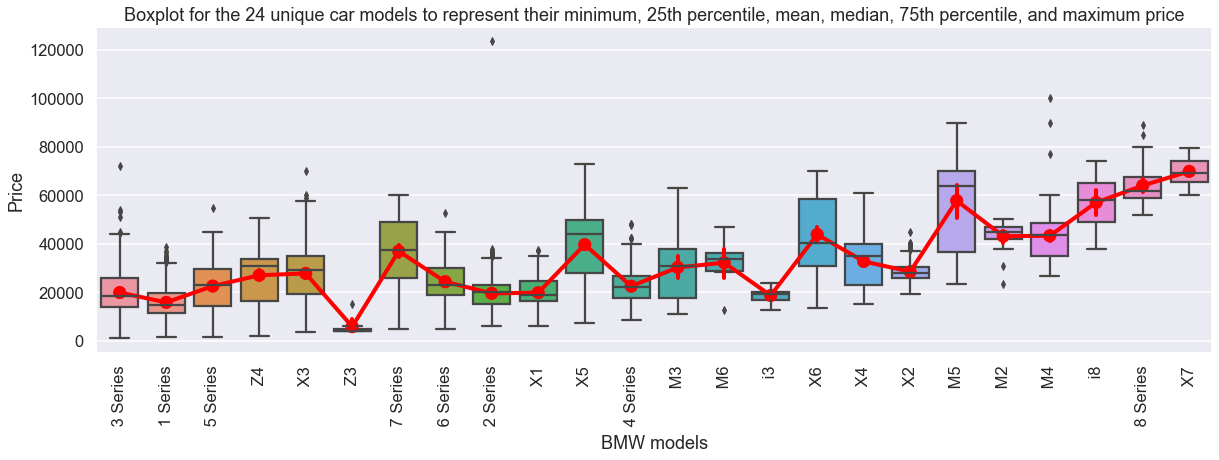

In [98]:
# create a new figure
plt.figure(figsize=(20,6))

# boxplot using seaborn and pandas
# dataset is sorted based on the 'price'
sns.boxplot(x='model', y='price', data=df.sort_values(by='price'))
sns.pointplot(x='model', y='price', data=df.sort_values(by='price'), color='red', alpha=0.5)
plt.title("Boxplot for the 24 unique car models to represent their minimum, 25th percentile, mean, median, 75th percentile, and maximum price")
plt.xlabel("BMW models")
plt.ylabel("Price")

# rotate the xticks by 90 degree to avoid overlapping
plt.xticks(rotation=90)
plt.show()

- X7 model cars have the highest average price
- 2 series car have an outlier car price of more than \\$120000
- M5 car has the higher interquartile range

The problem with boxplot is that it doesn't represent the mean and the number of samples (count of each model)

#### Boxplot of car prices from 1996 to 2020

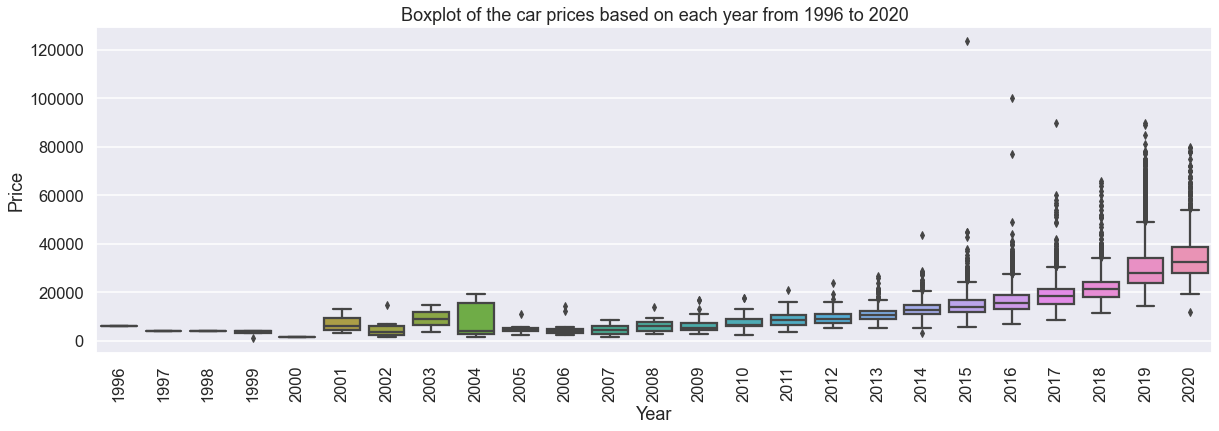

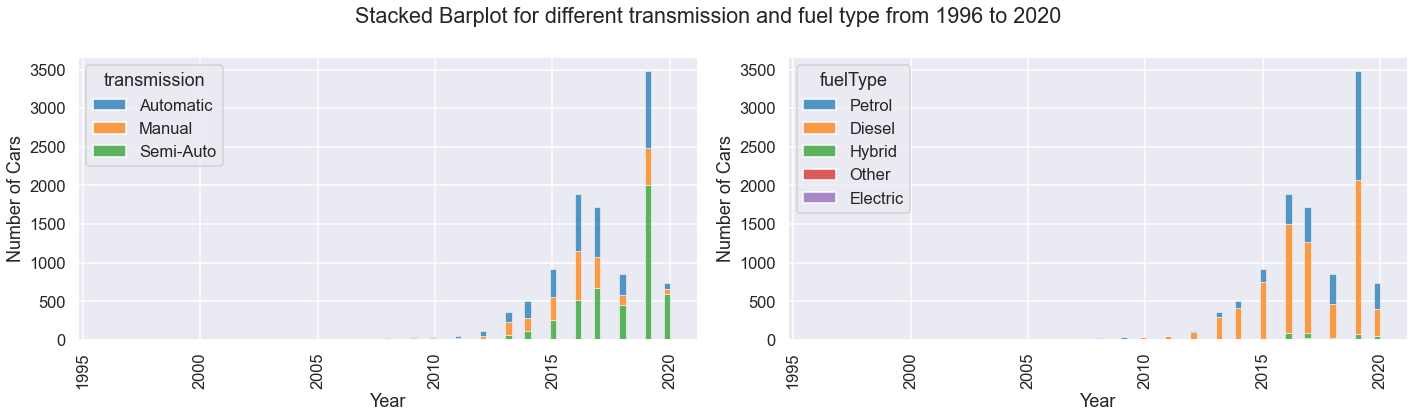

In [99]:
plt.figure(figsize=(20,6))

# dataset is sorted based on the 'year'
sns.boxplot(x='year', y='price', data=df.sort_values(by='year'))
plt.title("Boxplot of the car prices based on each year from 1996 to 2020")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

# stacked barplot
def stacked_barplot(hue):
    '''
    Args:
        hue (str): categorical variable
    Returns:
        Stacked barplot
    '''
    sns.histplot(x='year', hue=hue, data=df.sort_values(by='year'), multiple="stack")
    plt.xticks(rotation=90)
    plt.xlabel("Year")
    plt.ylabel("Number of Cars")


plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
stacked_barplot('transmission')

plt.subplot(1,2,2)
stacked_barplot('fuelType')

plt.suptitle("Stacked Barplot for different transmission and fuel type from 1996 to 2020")
plt.tight_layout()
plt.show()

- Based on year, the dataset contains lot of outliers which require further investigation
- Until 2010, the car price was below \\$20,000
- In 2020, used car prices vary from \\$20,000 to \\$80,000
- The dataset contains highest number of car samples from 2019
- Diesel and Petrol are the most dominant fuel type in this dataset

### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

In [100]:
def barplot_(col):
    '''
    This function finds the percentage of cars, average and total selling price by each category
    Args:
        col (str): categorical feature
    Returns:
        3 images of barplot
    '''
    # group the dataset by col and find the number of cars in each category, 
    # average selling price and total selling price 
    data = df.groupby(col)[['price']].agg(['count', 'mean', 'sum']).round(2)

    # reset the index
    data = data.reset_index()

    # sort the dataframe based on the 'count':number of cars in each category
    data = data.sort_values(by=('price','sum'), ascending=False)

    # convert the total selling price from $ to million $
    data[('price','sum')] = data[('price','sum')]/1000000

    # convert the number of cars to percentage of cars in each category
    data[('price','count')] = data[('price','count')]/100
    # display(data)

    plt.figure(figsize=(20,8))

    plt.subplot(1,3,1)
    sns.barplot(y=col, x=('price','count'), data=data, orient='h', color='blue', alpha=0.75)
    plt.title("Percentage of cars in each " + str(col))
    plt.xlabel("% of cars")
    plt.ylabel(col)

    plt.subplot(1,3,2)
    sns.barplot(y=col, x=('price','mean'), data=data, orient='h', color='green', alpha=0.75)
    plt.title("Average selling price of each car by " + str(col))
    plt.xlabel("Average selling price ($)")
    plt.ylabel("")

    plt.subplot(1,3,3)
    sns.barplot(y=col, x=('price','sum'), data=data, orient='h', color='orange')
    plt.title("Total selling price of each " + str(col))
    plt.xlabel("Total selling price ($ millions)")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

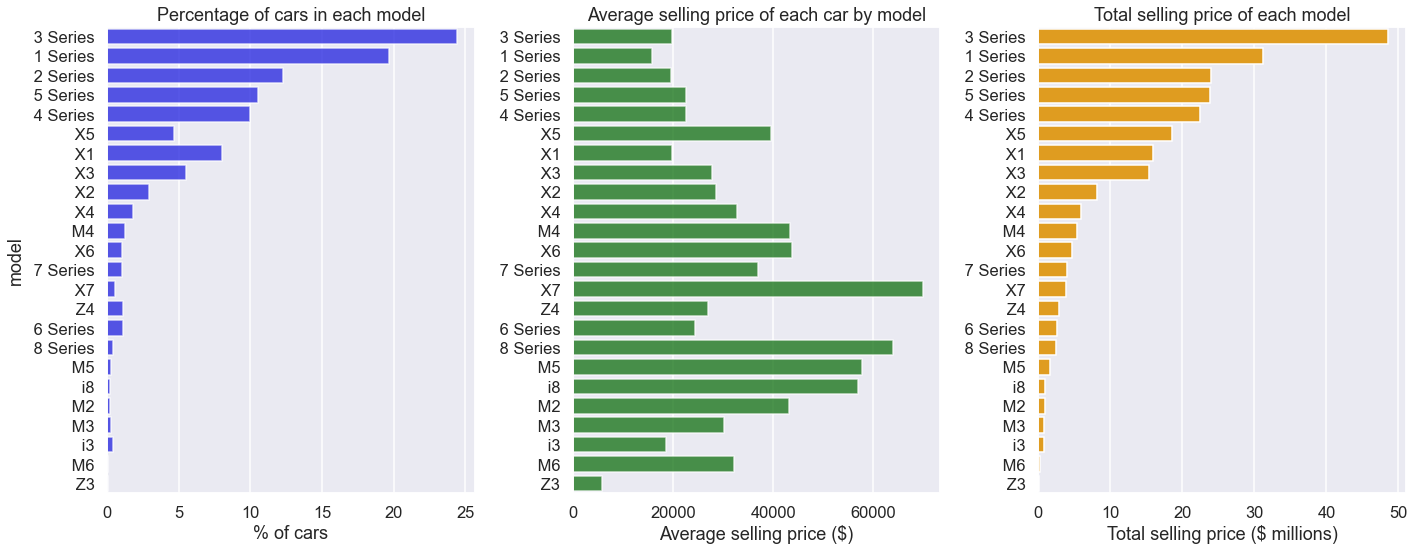

In [101]:
barplot_('model')

- Top 5 selling car models are 3 Series (24.4%), 1 Series (19.7%), 2 Series (12.3%), 5 Series (10.6%) and 4 Series (10%)
- Top 5 average selling price car models are X7 (\\$69,842), 8 Series (\\$63,997), M5 (\\$57,760), i8 (\\$57,012), and X6 (\\$43,838)
- Top 5 total selling price car models are 3 Series (\\$48.6M), 1 Series (\\$31.2M), 2 Series (\\$24M), 5 Series (\\$23.8M) and 4 Series (\\$22.4M)

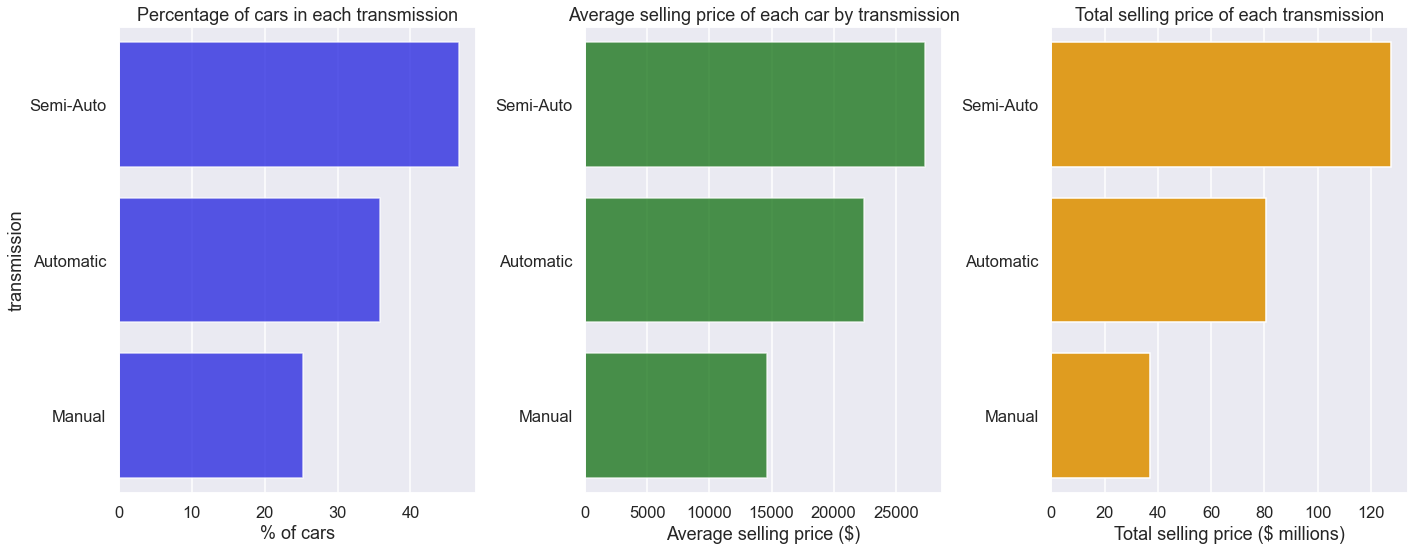

In [102]:
barplot_('transmission')

- From the above barplots, it's clear that the dataset contains most amount of data about the Semi-auto cars (47%)
- Total selling price of Semi-auto cars \\$127.6M, Automatic \\$80.4M, and Manual \\$37M

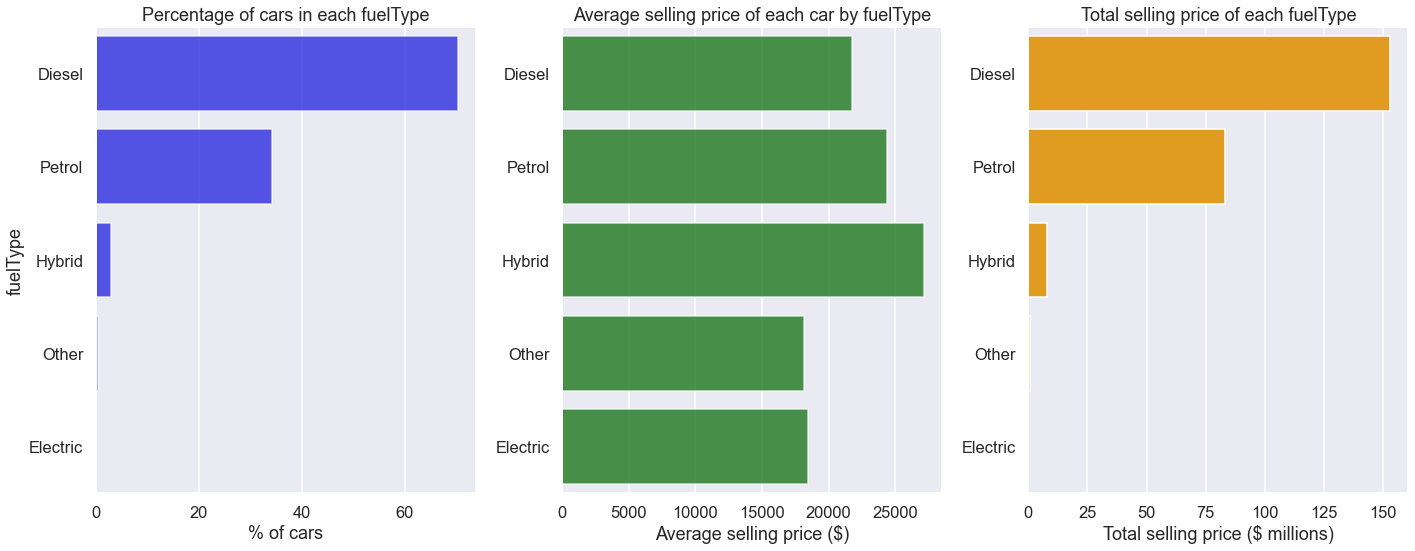

In [103]:
barplot_('fuelType')

- In this datset, most of the BMW cars are Diesel based 70.3% and second highest Petrol 34%
- Average price of a Hybrid car is greater than other fuel types
- Total selling price of cars by fuelType: Diesel based cars \\$153M, and Petrol based cars \\$83M

In [104]:
# separate the numeric columns
numeric_cols = df.select_dtypes(include='number').columns
display(numeric_cols)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

#### Distribution of the features and target variable for different transmission and fuel type

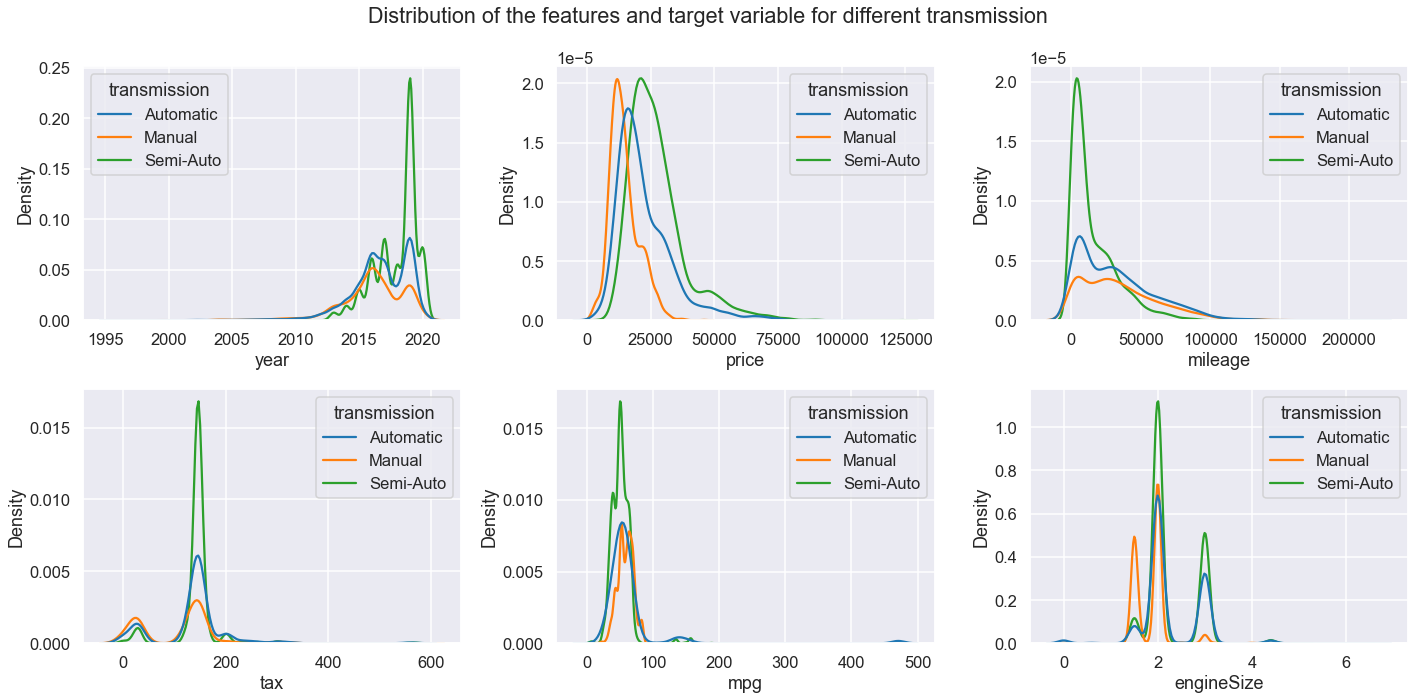

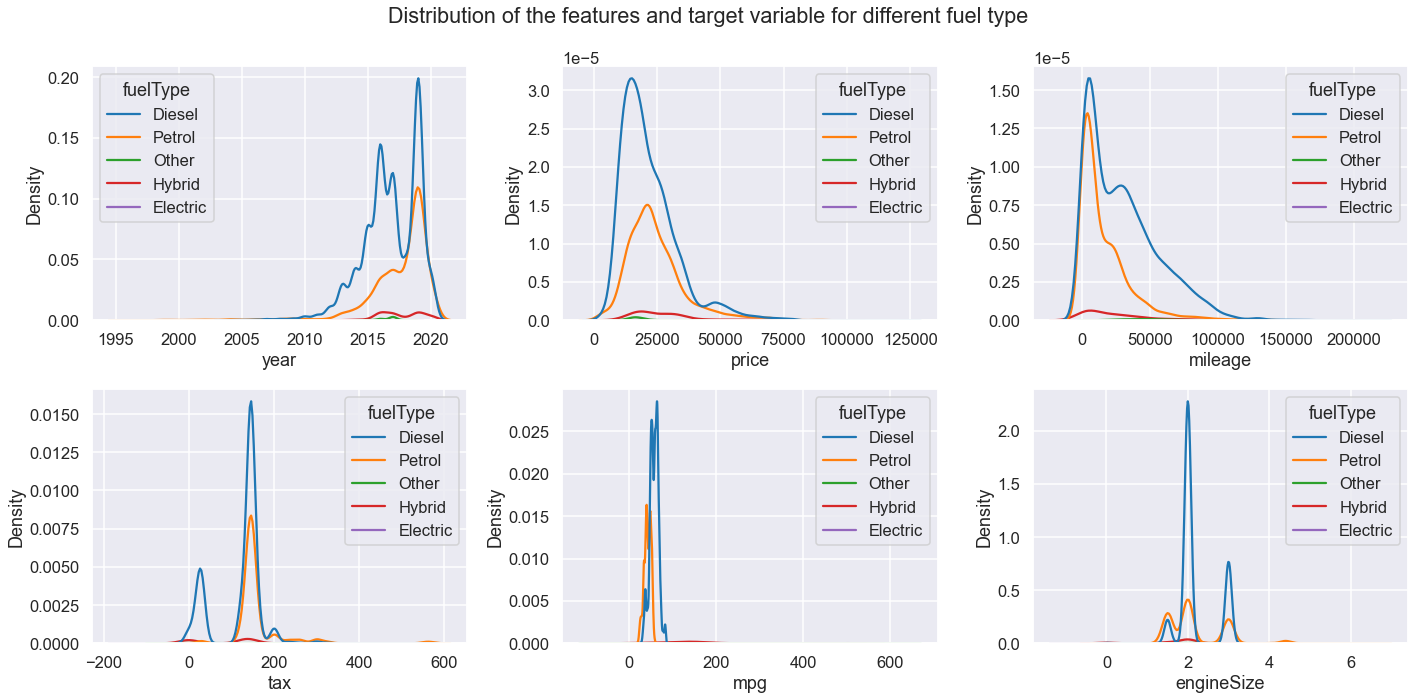

In [105]:
plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.kdeplot(x=numeric_cols[col], data=df, hue='transmission', common_norm=True)

plt.suptitle("Distribution of the features and target variable for different transmission")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.kdeplot(x=numeric_cols[col], data=df, hue='fuelType', common_norm=True)

plt.suptitle("Distribution of the features and target variable for different fuel type")
plt.tight_layout()
plt.show()

From the above distribution plots, it's clear that the given features are not normally distributed. Few features also contain outliers. So we can perform data transformation before applying linear models or apply ensemble learning, where normally distributed features are not mandatory.

#### ECDF of the features and target variable

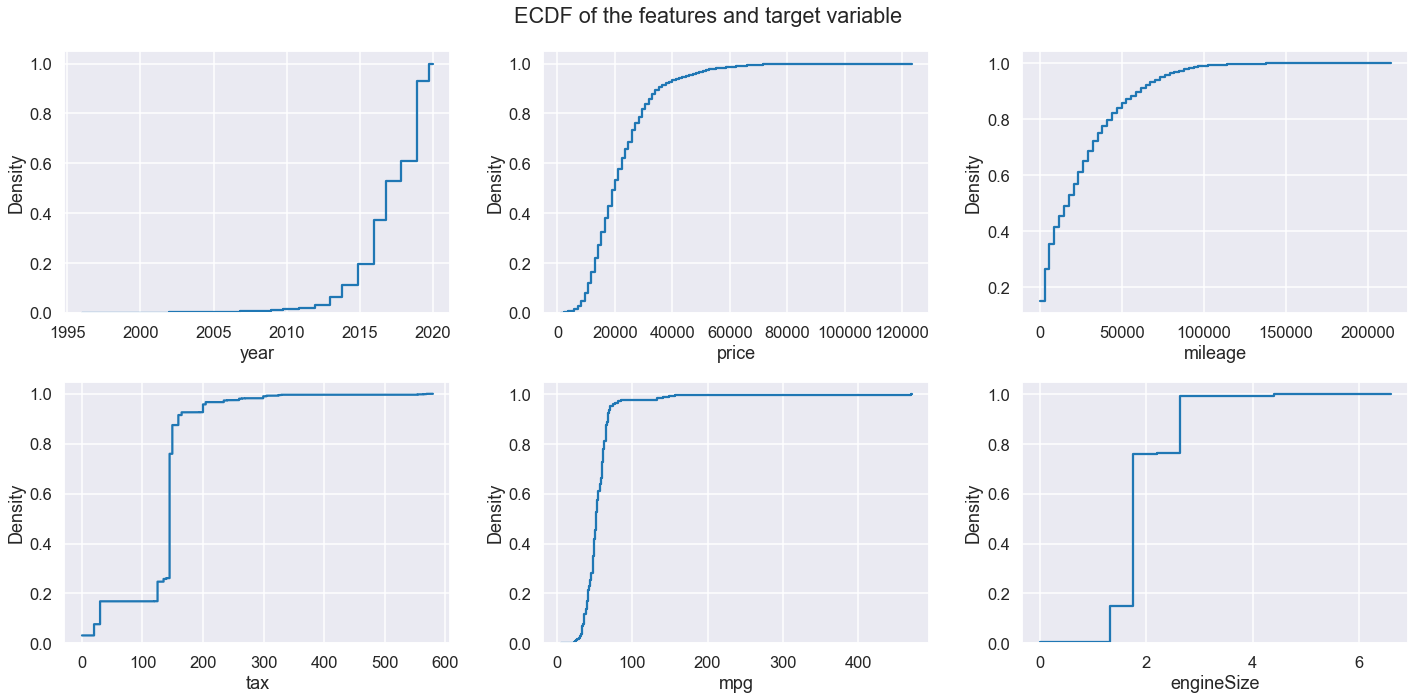

In [106]:
plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.histplot(x=numeric_cols[col], data=df, stat="density", cumulative=True, fill=False, element="step")

plt.suptitle("ECDF of the features and target variable")
plt.tight_layout()
plt.show()

- 50% of the cars have price less or than equal \\$20,000
- 90% of the cars have price less or than equal \\$30,000
- 82% of the cars have mileage less or than equal 50,000. That means they are in quite good condition!
- nearly 98% of the cars have tax less than or equal to \\$200. Very few cars have tax greater than \\$200
- nearly 99% of the cars have mpg less than or equal to 100

#### Scatterplot and residualplot of the features and target variable 'price'

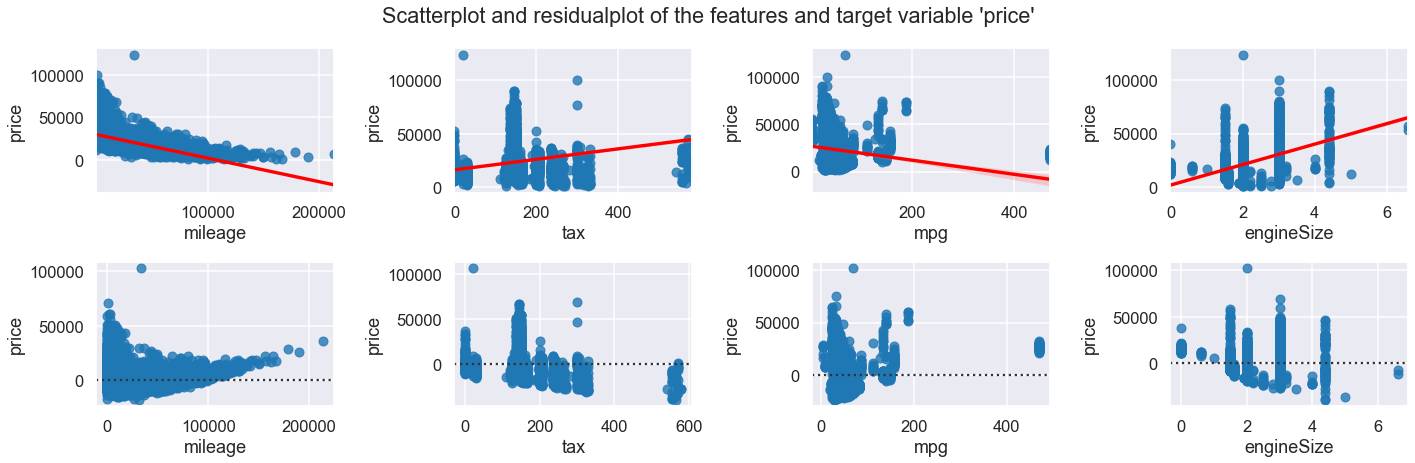

In [107]:
numeric_features = ['mileage', 'tax', 'mpg', 'engineSize']

target = 'price'

plt.figure(figsize=(20,12))
for i in range(len(numeric_features)):
    
    plt.subplot(4,4,i+1)
    sns.regplot(x=numeric_features[i], y=target, data=df, line_kws={"color": "red"})
    
    plt.subplot(4,4,i+5)
    sns.residplot(x=numeric_features[i], y=target, data=df)
    
plt.suptitle("Scatterplot and residualplot of the features and target variable 'price'")
plt.tight_layout()
plt.show()

If we try to fit the each feature with the target variable 'price', we can see that, we can't define them in linear regression: can't fit the feature and target in a straight line. Also, residuals are quite high.

#### Outlier removal

In [108]:
df = df[df['mpg'] <= 150]

'mpg' columns contain outliers because mpg for the bmw cars can't be more than 125
<br>Assumption: **'mpg' > 150 are outliers**

Number of rows after outlier removal  = 10686
<br>Number of rows before outlier removal = 10781

So, number of rows removed = 10781 - 10686 = 95

### Feature Enginerring

In [109]:
# create a new categorial feature 'Engine_Size' 
# engineSize 0L to 1L: small
# engineSize 1L to 2L: medium
# engineSize 2L to 3L: large
# engineSize 3L to 7L: Extra_Large
df['Engine_Size'] = pd.cut(df['engineSize'], 
                           bins=[-1,1,2,3,8], 
                           labels=["small", "medium", "large", "Extra_Large"])

# create a new categorial feature 'road_tax_range'
# road_tax_range $0 to $150: below_150
# road_tax_range $150 to $300: 150_300
# road_tax_range $300 to $450: 300_450
# road_tax_range $450 to $600: 450_600
df['road_tax_range'] = pd.cut(df['tax'], 
                              bins=[-1, 150, 300, 450, 600], 
                              labels=["below_150", "150_300", "300_450", "450_600"])

# create a new categorial feature 'mileage_range' 
# mileage_range 0 miles to 50000 miles : Excellent
# mileage_range 50000 miles to 100000 miles : Good
# mileage_range 100000 miles to 150000 miles : Medium
# mileage_range 150000 miles to 214000 miles : Bad
df['mileage_range'] = pd.cut(df['mileage'],
                             bins=[-1, 50000, 100000, 150000, 214000], 
                             labels=["Excellent", "Good", "Medium", "Bad"])

df['year'] = df['year'].astype('int')

# create a new feature 'car_age'
df ['car_age'] = 2021 - df['year']

# create a new categorial feature 'car_age_range' 
# car_age_range 0 to 5 years : <=5
# car_age_range 5 to 10 years : 5<age<=10
# car_age_range 10 to 15 years : 10<age<=15
# car_age_range 15 to 20 years : 15<age<=20
# car_age_range 20 to 25 years : 20<age<=25
df['car_age_range'] = pd.cut(df['car_age'],
                             bins=[-1, 5, 10, 15, 20, 25],
                             labels=["below_5", "between_5_to_10", "between_10_to_15", "between_15_to_20", "greater_than_20"])

df = df.drop('car_age', axis=1)

#### Scatterplot of the feature vs target variable based on 'transmission'

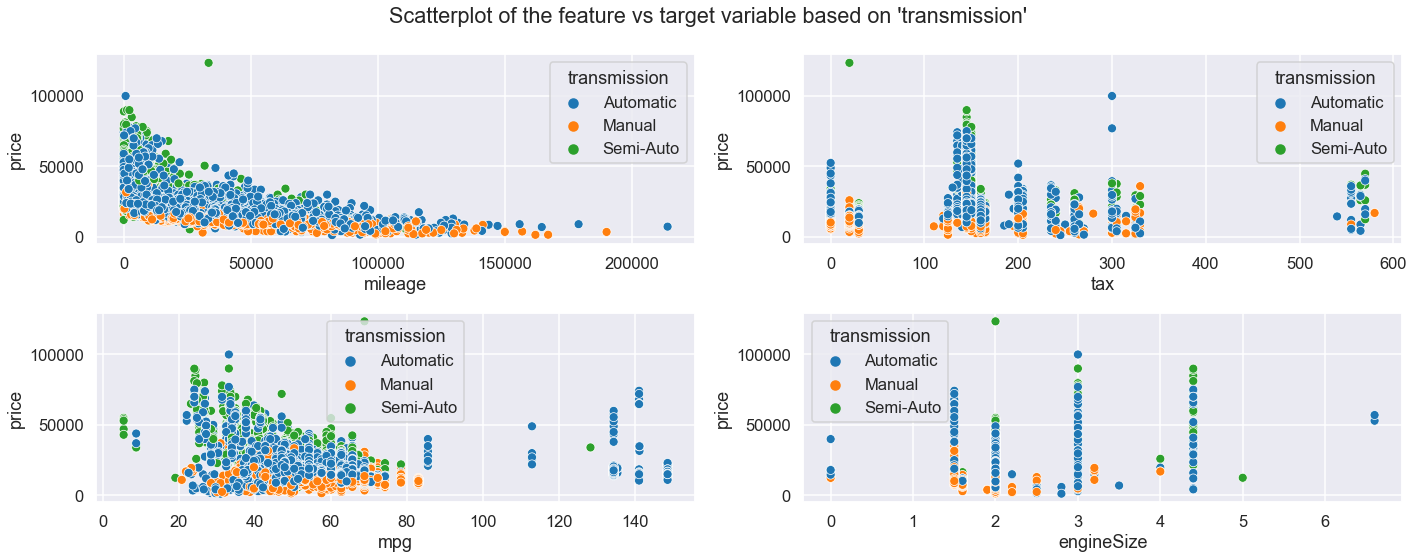

In [110]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='transmission')

plt.suptitle("Scatterplot of the feature vs target variable based on 'transmission'")
plt.tight_layout()   
plt.show()

- Road tax and engineSize variables don't look like numerical features. They seem categorical features.
- Manual transmission cars are cheap, semi-auto cars are the most expensive
- Manual transmission cars have lower mpg
- As the mileage increases, prices are decreasing. But for other features (tax, mpg, engineSize), the relationship with the price is non-linear

#### Scatterplot of the feature vs target variable based on 'mileage_range'

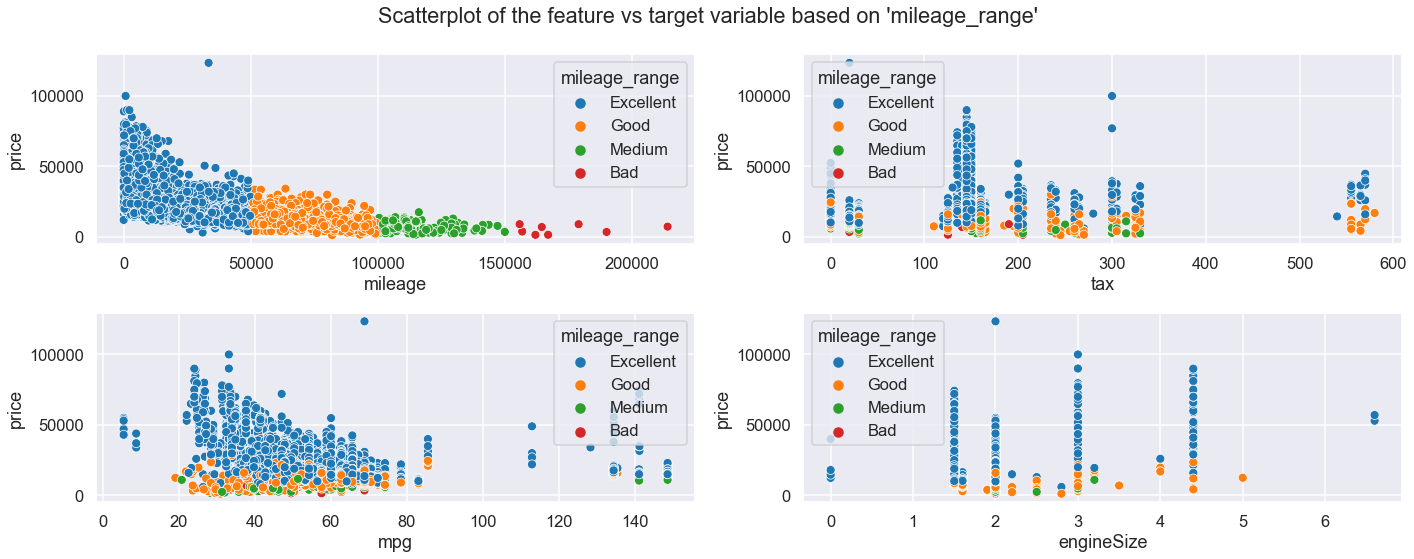

In [111]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='mileage_range')

plt.suptitle("Scatterplot of the feature vs target variable based on 'mileage_range'")
plt.tight_layout()   
plt.show()

- Excellent (lower mileage) condition cars have the best selling value
- mileage_range no specific relation with road tax, mpg, and engineSize

### Scatterplot of the feature vs target variable based on 'road_tax_range'

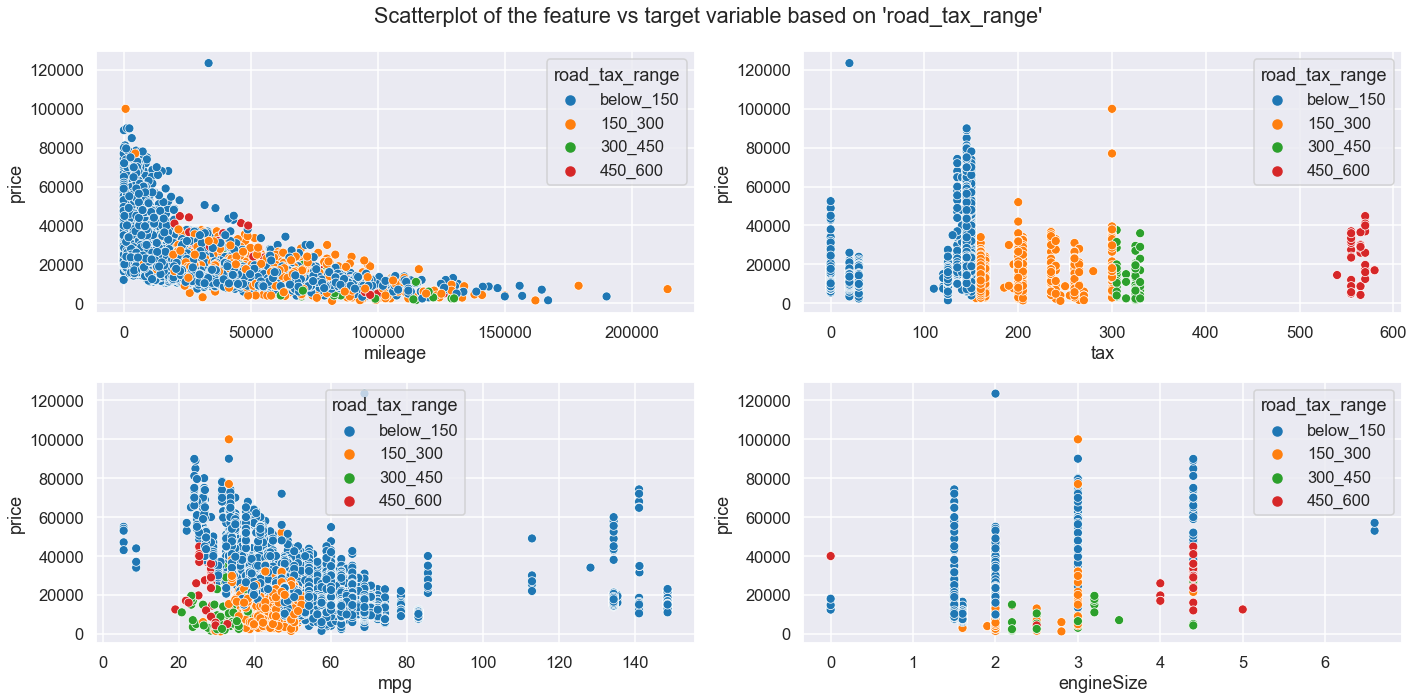

In [112]:
plt.figure(figsize=(20,10))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='road_tax_range')

plt.suptitle("Scatterplot of the feature vs target variable based on 'road_tax_range'")
plt.tight_layout()   
plt.show()

- Largest number of cars have tax below \\$150
- I was curious if there's any relation between the engineSize and tax, seems None. We'll look for it from a different angle.

### Scatterplot of the feature vs target variable based on 'Engine_Size'

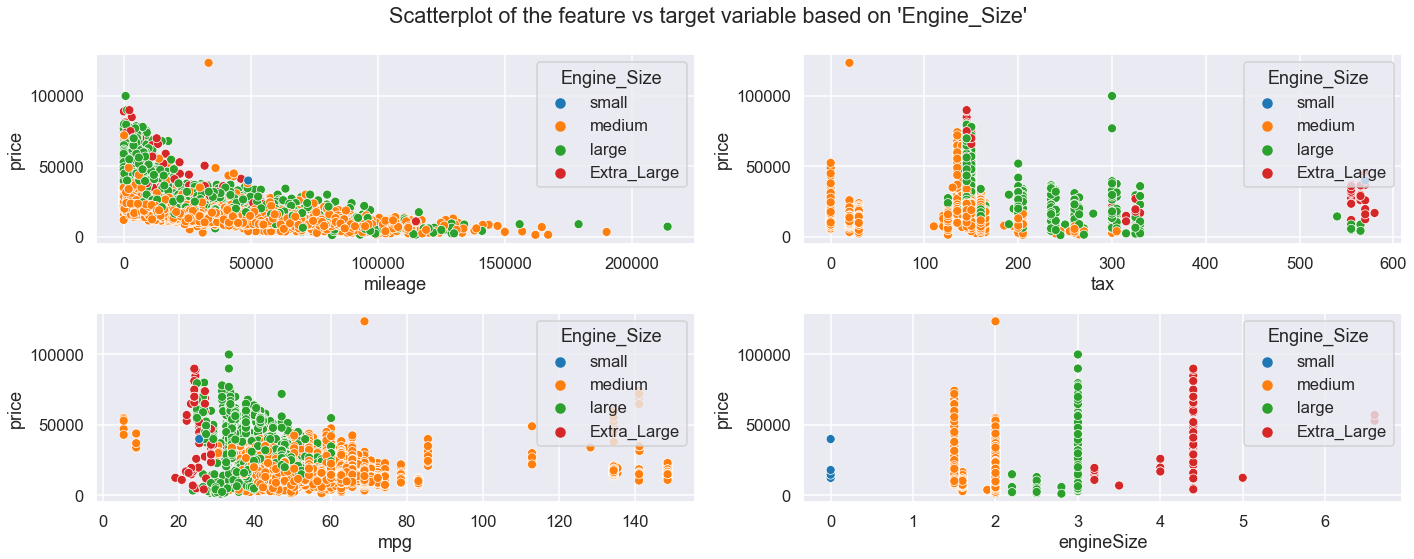

In [113]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='Engine_Size')

plt.suptitle("Scatterplot of the feature vs target variable based on 'Engine_Size'")
plt.tight_layout()   
plt.show()

- medium Engine_Size cars are less expensive and lower tax
- Finally, we can see that, if the Engine_Size increases, the tax is also increasing
- Engine_Size and mpg have a negative correlation. If the Engine_Size increases, the mpg is decreasing

#### Scatterplot of the feature vs target variable based on 'fuelType'

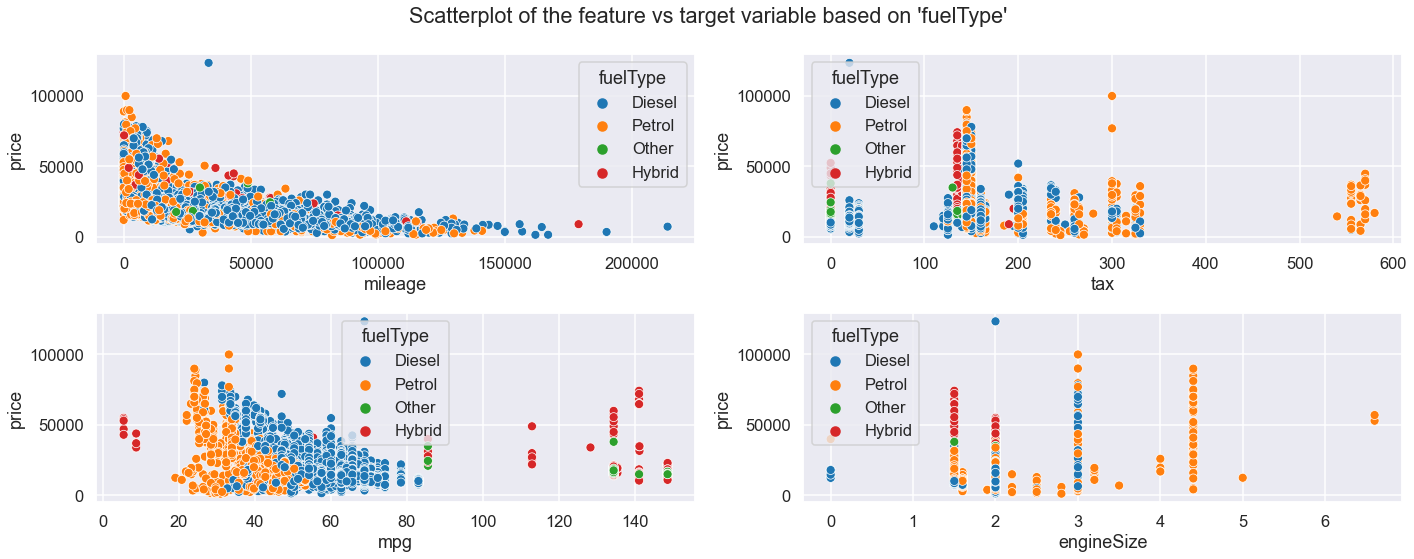

In [114]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='fuelType')

plt.suptitle("Scatterplot of the feature vs target variable based on 'fuelType'")
plt.tight_layout()   
plt.show()

- Diesel and Petrol based cars the popular choices
- Petrol based cars have higher road tax, lower mpg and larger engineSize
- Hybrid cars have higher mpg

### Boxenplots along with the pointplot for different categorical features

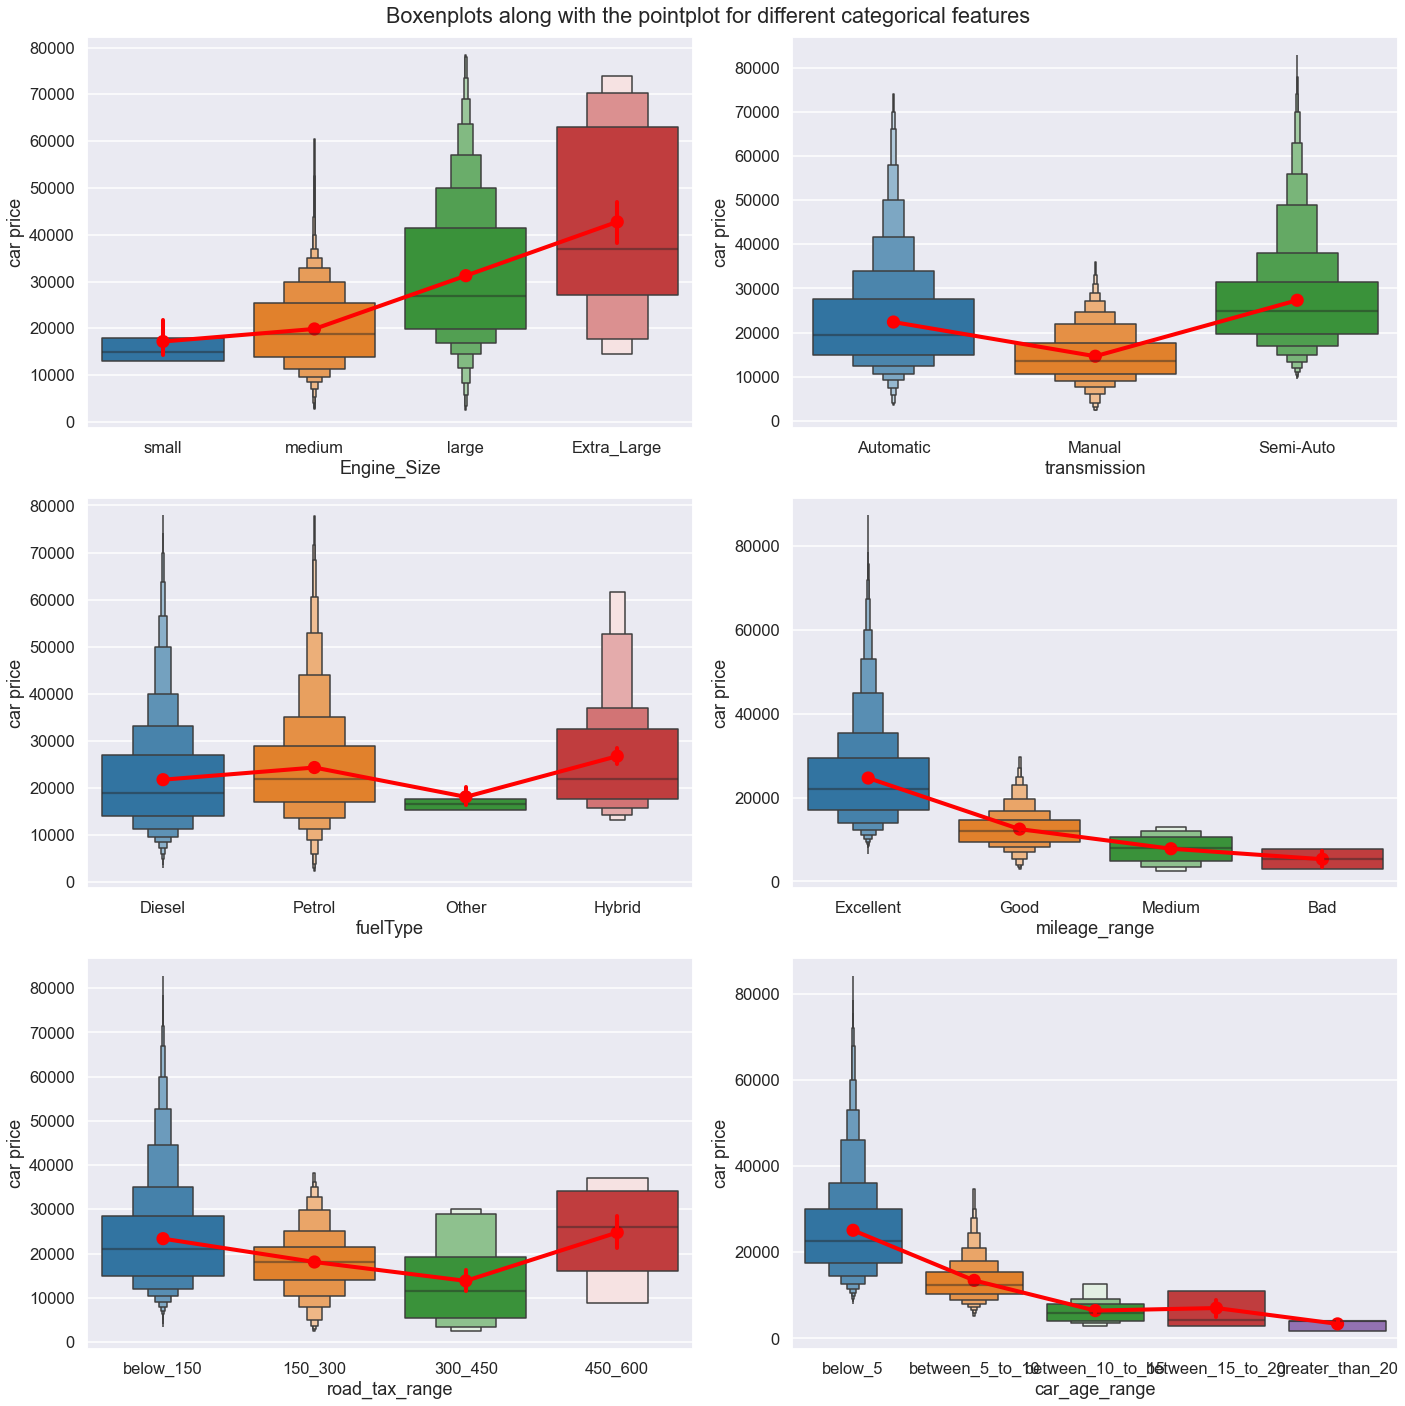

In [115]:
cal_cols = ['Engine_Size', 'transmission', 'fuelType', 'mileage_range', 'road_tax_range', 'car_age_range']

plt.figure(figsize=(20,20))

for col in range(len(cal_cols)):
    plt.subplot(3,2,col+1)
    sns.boxenplot(x=cal_cols[col], y='price', data=df, showfliers=False)
    sns.pointplot(x=cal_cols[col], y='price', data=df, color='red')
    plt.ylabel("car price")

plt.suptitle("Boxenplots along with the pointplot for different categorical features")
plt.tight_layout()
plt.show()

Boxenplot has all the statistical features of boxplot. In addition, it helps to understand the quantiles better.
- Manual transmission cars have low selling price and least popular. Automatic and semi-auto transmission cars prices vary to very cheap to expensive
- Diesel, Petrol and Hybrid cars are popular choices

Characateristics of the most expensive cars:
- Extra large engine size 
- Semi-auto transmission
- Hybrid 
- Excellent mileage range
- Most recent years model

In [116]:
def correlation_heatmap(df):
    """
    Creates a heatmap of the Pearson correlation coefficients
    Args:
        df (dataframe): correlation among the variables
    Returns:
        heatmap
    """
    
    # find the Pearson correlation coefficients
    correlation_matrix = df.corr()

    # create a mask of lower triangular matrix
    mask = np.zeros_like(correlation_matrix)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (10,10))

    # create a heatmap of the correlation coefficients
    sns.heatmap(correlation_matrix, linewidths=0.2, 
                vmax=1.0, vmin=-1., 
                square=True, cmap='RdYlGn', 
                linecolor='white', annot=True, mask = mask) 
    
    plt.title('Heatmap of the Pearson Correlation Coefficients')

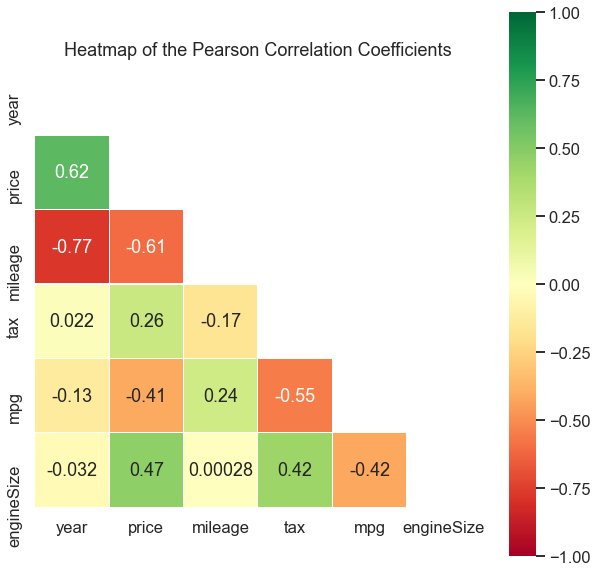

In [117]:
# set the background of the images
sns.set_style('whitegrid')

correlation_heatmap(df[numeric_cols])

- The price increases when engineSize increases
- Car price has a negative correlation with the mpg. That's quite opposite what we think- A good car should have high mpg
- If the mileage increases, the car price drops
- Road tax has a positive correlation with the engineSize
- As the engineSize increases, the mpg decreases
- Car price has a very positive correlation with the year


In [118]:
display(df.head())
display(df.tail())

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize Engine_Size road_tax_range mileage_range    car_age_range  
0         2.0      medium      below_150          Good  between_5_to_10  
1         2.0      medium      below_150     Excellent          below_5  
2         3.0       large        150_300          Good          below_5  
3         1.5      medium      below_150     Excellent          below_5  
4         3.0       large        150_300     Excellent  between_5_to_10

model  year  price transmission  mileage fuelType  tax   mpg  \
10776         X3  2016  19000    Automatic    40818   Diesel  150  54.3   
10777   5 Series  2016  14600    Automatic    42947   Diesel  125  60.1   
10778   3 Series  2017  13100       Manual    25468   Petrol  200  42.8   
10779   1 Series  2014   9930    Automatic    45000   Diesel   30  64.2   
10780         X1  2017  15981    Automatic    59432   Diesel  125  57.6   

       engineSize Engine_Size road_tax_range mileage_range    car_age_range  
10776         2.0      medium      below_150     Excellent          below_5  
10777         2.0      medium      below_150     Excellent          below_5  
10778         2.0      medium        150_300     Excellent          below_5  
10779         2.0      medium      below_150     Excellent  between_5_to_10  
10780         2.0      medium      below_150          Good          below_5

In [119]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 0 to 10780
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   model           10686 non-null  object  
 1   year            10686 non-null  int32   
 2   price           10686 non-null  int64   
 3   transmission    10686 non-null  object  
 4   mileage         10686 non-null  int64   
 5   fuelType        10686 non-null  object  
 6   tax             10686 non-null  int64   
 7   mpg             10686 non-null  float64 
 8   engineSize      10686 non-null  float64 
 9   Engine_Size     10686 non-null  category
 10  road_tax_range  10686 non-null  category
 11  mileage_range   10686 non-null  category
 12  car_age_range   10686 non-null  category
dtypes: category(4), float64(2), int32(1), int64(3), object(3)
memory usage: 1.1+ MB


year          price        mileage           tax           mpg  \
count  10686.000000   10686.000000   10686.000000  10686.000000  10686.000000   
mean    2017.074396   22695.052311   25550.388171    132.056429     54.227756   
std        2.354972   11403.223311   25197.858356     61.372681     15.567906   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14898.250000    5524.250000    135.000000     45.600000   
50%     2017.000000   20440.000000   18379.500000    145.000000     52.300000   
75%     2019.000000   27890.000000   38354.500000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    148.700000   

         engineSize  
count  10686.000000  
mean       2.176352  
std        0.538350  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000

There are 12 features.
<br>Among them, there are 5 numerical features 'year', 'mileage', 'tax', 'mpg', 'engineSize'

In [120]:
# df.to_csv("bmw_used_cars.csv", index=False)

Now, the dataset contains originals variables + additional engineered variables
<br>Steps I have followed:

**Data preprocessing:**
1. Data Transformation
2. One-hot encoding

**Feature Selection**
1. Variance Threshold
2. Recursive Feature Elimination

**Machine Learning** (Training with 5 fold cross-validation and grid search)
1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Extreme Gradient Boosting

**Target Variable Transformation**

**Comparison of the Key performance Indicators:**
1. Mean Absolute Error
2. Root Mean Squared Error
3. R squared

In [121]:
# separate the training features
train = df.drop(['price'], axis=1)

# seprate the target variable
target = df[['price']]

#### Data Transformation

In [122]:
# numeric features
numeric_cols = train.select_dtypes(include='number').columns
print(numeric_cols)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


We already know that, our features are not normally distributed. A power transform will make the probability distribution of a variable more Gaussian. This is often described as removing a skew in the distribution, although more generally is described as  stabilizing the variance of the distribution.

references: 
<br>[1] https://machinelearningmastery.com/power-transforms-with-scikit-learn/
<br>[2] https://medium.com/@josecacho/how-to-use-powertransformer-to-improve-model-performance-e62357fb4df8

In [123]:
scale = PowerTransformer()

# using a loop to standardize only the numeric columns
for col in numeric_cols:
    train[col] = scale.fit_transform(train[[col]])

display(train.head())
display(train.describe())

model      year transmission   mileage fuelType       tax       mpg  \
0   5 Series -1.342833    Automatic  1.376034   Diesel -0.076490  0.346900   
1   6 Series  0.387343    Automatic -0.083649   Petrol  0.241080 -0.758725   
2   5 Series -0.497436    Automatic  1.295717   Diesel  0.475549 -0.081679   
3   1 Series -0.060080    Automatic  0.398395   Diesel  0.241080  1.224749   
4   7 Series -1.342833    Automatic  0.779354   Diesel  0.475549 -0.155037   

   engineSize Engine_Size road_tax_range mileage_range    car_age_range  
0   -0.248848      medium      below_150          Good  between_5_to_10  
1   -0.248848      medium      below_150     Excellent          below_5  
2    1.483336       large        150_300          Good          below_5  
3   -1.425559      medium      below_150     Excellent          below_5  
4    1.483336       large        150_300     Excellent  between_5_to_10

year       mileage           tax           mpg    engineSize
count  1.068600e+04  1.068600e+04  1.068600e+04  1.068600e+04  1.068600e+04
mean   1.106441e-15 -2.553326e-16  7.234424e-16  2.127772e-16 -2.446937e-15
std    1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00
min   -7.439609e+00 -2.180937e+00 -2.361598e+00 -7.253610e+00 -8.404737e+00
25%   -4.974362e-01 -7.073048e-01  8.304880e-02 -5.260838e-01 -2.488478e-01
50%   -6.007966e-02  8.170000e-02  2.410798e-01 -1.672441e-02 -2.488478e-01
75%    8.450578e-01  7.477188e-01  2.410798e-01  6.759834e-01 -2.488478e-01
max    1.313297e+00  3.126329e+00  6.385304e+00  4.138298e+00  4.855079e+00

#### Distribution of the numerical features after power transformation

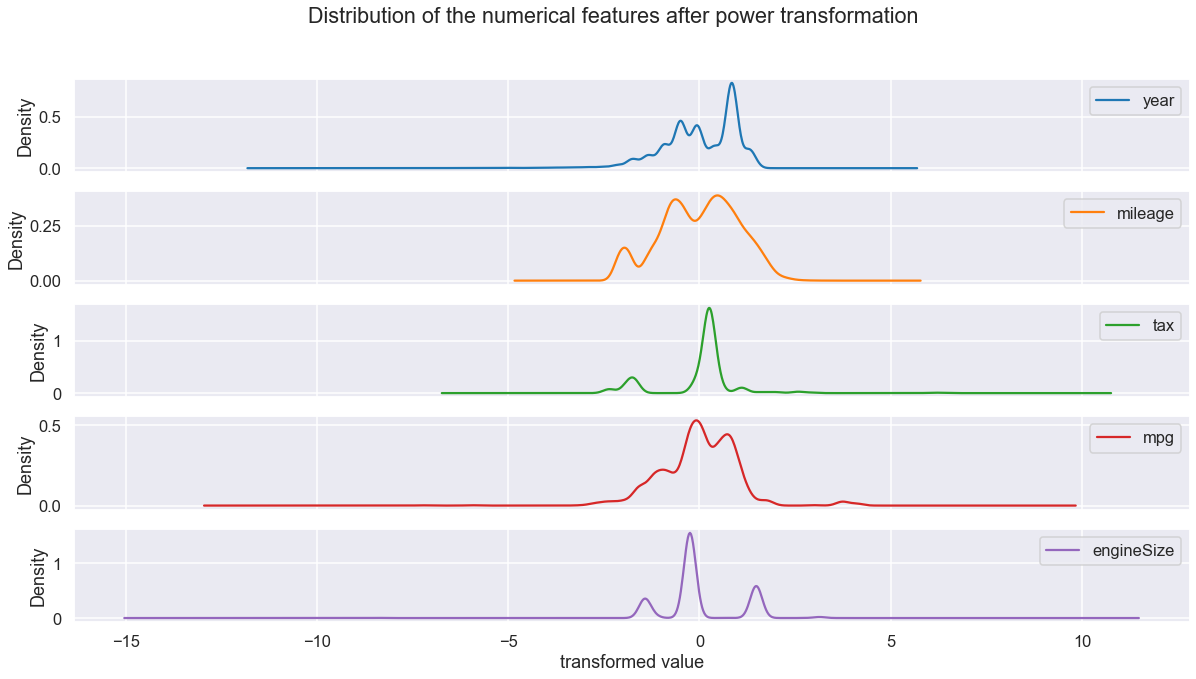

In [174]:
# set the background of the images
sns.set_style('darkgrid')

train[numeric_cols].plot(kind='kde', subplots=True, figsize=(20,10), 
                         title="Distribution of the numerical features after power transformation")
plt.xlabel("transformed value")
plt.show()

In [125]:
#### one-hot encoding

In [126]:
# one-hot encoding
train = pd.get_dummies(train)

# Let's check the data
display(train.head())
display(train.info())

year   mileage       tax       mpg  engineSize  model_ 1 Series  \
0 -1.342833  1.376034 -0.076490  0.346900   -0.248848                0   
1  0.387343 -0.083649  0.241080 -0.758725   -0.248848                0   
2 -0.497436  1.295717  0.475549 -0.081679    1.483336                0   
3 -0.060080  0.398395  0.241080  1.224749   -1.425559                1   
4 -1.342833  0.779354  0.475549 -0.155037    1.483336                0   

   model_ 2 Series  model_ 3 Series  model_ 4 Series  model_ 5 Series  ...  \
0                0                0                0                1  ...   
1                0                0                0                0  ...   
2                0                0                0                1  ...   
3                0                0                0                0  ...   
4                0                0                0                0  ...   

   road_tax_range_450_600  mileage_range_Excellent  mileage_range_Good  \
0                       0                        0                   1   
1                       0                        1                   0   
2                       0                        0                   1   
3                       0                        1                   0   
4                       0                        1                   0   

   mileage_range_Medium  mileage_range_Bad  car_age_range_below_5  \
0                     0                  0                      0   
1                     0                  0                      1   
2                     0                  0                      1   
3                     0                  0                      1   
4                     0                  0                      0   

   car_age_range_between_5_to_10  car_age_range_between_10_to_15  \
0                              1                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              1                               0   

   car_age_range_between_15_to_20  car_age_range_greater_than_20  
0                               0                              0  
1                               0                              0  
2                               0                              0  
3                               0                              0  
4                               0                              0  

[5 rows x 52 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 0 to 10780
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10686 non-null  float64
 1   mileage                         10686 non-null  float64
 2   tax                             10686 non-null  float64
 3   mpg                             10686 non-null  float64
 4   engineSize                      10686 non-null  float64
 5   model_ 1 Series                 10686 non-null  uint8  
 6   model_ 2 Series                 10686 non-null  uint8  
 7   model_ 3 Series                 10686 non-null  uint8  
 8   model_ 4 Series                 10686 non-null  uint8  
 9   model_ 5 Series                 10686 non-null  uint8  
 10  model_ 6 Series                 10686 non-null  uint8  
 11  model_ 7 Series                 10686 non-null  uint8  
 12  model_ 8 Series                 

None

Before one-hot encoding, there were 12 features. 
<br>After one-hot encoding, there are 53 features.

### Feature Selection

Removing the features which have very low variance. Low variance features are considered insignificant for the prediction

In [127]:
def variance_threshold_selector(data, threshold):
    """
    This function removes the features with a variance lower than the threshold
    Args:
        data (dataFrame): pandas DataFrame
        threshold (float): Features with variance lower than this threshold will be removed
    Returns:
        a dataFrame with the actual index and column names
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    
    return data[data.columns[selector.get_support(indices=True)]]

In [128]:
# number of features in the training set
n_features = train.shape[1]

# apply the variance threshold
train = variance_threshold_selector(train, 0.002)

# display(train.head())
# display(train.info())

print("Actual number of features in the dataset = ", n_features)

# after removing the features with lower variance
n_features_var_threshold = train.shape[1]
print("Number of remaining features in the dataset = ", n_features_var_threshold)

# percentage of reduction in features
p_reduced_features = int((n_features - n_features_var_threshold)*100/n_features)
print("Number of features reduced = ", n_features - n_features_var_threshold)
print("Percentage of total features reduced = ", p_reduced_features, "%")

Actual number of features in the dataset =  52
Number of remaining features in the dataset =  45
Number of features reduced =  7
Percentage of total features reduced =  13 %


#### Splitting the data for training and testing

In [129]:
# training size = 80%, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_train : (8548, 45)
y_train : (8548, 1)
X_test : (2138, 45)
y_test : (2138, 1)


#### Feature Selection method: Recursive Feature Elimination (RFE)
RFE is an efficient approach for eliminating features from a training dataset and it selects those features in a training dataset that are most relevant in predicting the target variable. There are two important configuration options when using RFE: the choice in the number of features to select (n_features_to_select) and the choice of the algorithm used to help choose features (estimator).

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

I have used XGB Regressor and done some experiment by varying the n_features_to_select from 45 to 30. Finally, I found that, starting with 45 features and removing the least important feature at each iteration, up to n_features_to_select=37, the model performs best.

ref: [3] https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [130]:
rfe = RFE(estimator=xgb.XGBRegressor(random_state=42), n_features_to_select=37, step=1, verbose=1)
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.


In [131]:
# list of selected features after the recursive feature elimination (RFE)
rfe_cols = X_train.columns[rfe.support_]

n_features_rfe = rfe_cols.shape[0]
print("Number of remaining features after Variance Threshold method and RFE = ", n_features_rfe)
print("Finally selected features for training = ", rfe_cols)

# percentage reduction of features from the actual number of features
p_reduced_features_rfe = int((n_features - n_features_rfe)*100/n_features)
print("Number of features reduced after Variance Thresholding and RFE = ", n_features - n_features_rfe)
print("Percentage of total features reduced = ", p_reduced_features_rfe, "%")

Number of remaining features after Variance Threshold method and RFE =  37
Finally selected features for training =  Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 1 Series',
       'model_ 2 Series', 'model_ 3 Series', 'model_ 4 Series',
       'model_ 5 Series', 'model_ 6 Series', 'model_ 7 Series',
       'model_ 8 Series', 'model_ M3', 'model_ M4', 'model_ M5', 'model_ X1',
       'model_ X2', 'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6',
       'model_ X7', 'model_ Z4', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol',
       'Engine_Size_medium', 'Engine_Size_large', 'road_tax_range_150_300',
       'mileage_range_Good', 'car_age_range_between_5_to_10',
       'car_age_range_between_10_to_15'],
      dtype='object')
Number of features reduced after Variance Thresholding and RFE =  15
Percentage of total features reduced =  28 %


In [132]:
# keeping only the selected features from lower variance features removal and RFE
X_train = X_train[rfe_cols]
X_test = X_test[rfe_cols]

print(X_train.shape, X_test.shape)

(8548, 37) (2138, 37)


#### Linear Regression

In [133]:
# using statsmodel for the training
model_LR = sm.OLS(y_train, X_train)
result_LR = model_LR.fit()
print(result_LR.summary())

# prediction
y_pred_LR = result_LR.predict(X_test)

# mean absolute error
MAE_LR = mean_absolute_error(y_test, y_pred_LR)

# root mean squared error
RMSE_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))

# coefficient of determination
r2_LR = r2_score(y_test, y_pred_LR)

print("MAE : ", MAE_LR, "RMSE : ", RMSE_LR, "r2_score :", r2_LR)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1936.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:21:05   Log-Likelihood:                -82608.
No. Observations:                8548   AIC:                         1.653e+05
Df Residuals:                    8512   BIC:                         1.655e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
year        

**Null hypothesis:** There is no relationship between the feature and the target variable. That means the coefficient of the feature variable will be 0.
<br>When p-value < 0.05 for a feature, we can reject the null hypothesis, that means that feature has a relation with the target variable.

When p-value > 0.05, we can't reject the null hypothesis. 

That means all features of p-value<0.05 are important here.

<br>MAE lower is better
<br>RMSE lower is better
<br> r2_score greater is better
<br>MAE and RMSE are very high for the Linear Regression model and r2_score is also low. So, we'll now move to ensemble learning.

In [167]:
# saving the model
# pickle.dump(model_LR, open('model_LR.sav', 'wb'))

#### Saving the Cross-validation results

In [134]:
def cv_result(model):
    """
    This function returns the grid search and cross-validation results in a DataFrame
    Args:
        model: trained model
    Returns:
        a datafrmae
    """

    # create a new dataframe from the grid search cross-validation results
    cross_val_result = pd.DataFrame(model.cv_results_)
    
    # list of columns to drop
    drop_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 
                 'std_score_time', 'params']

    cross_val_result = cross_val_result.drop(drop_cols, axis=1)
    cross_val_result = cross_val_result.sort_values(by='rank_test_score')
    
    # return a dataframe
    return cross_val_result

#### Prediction and Key Performance Indicators

In [160]:
def model_output(X_test, y_test, model):
    """
    Args:
        X_test (dataFrame): testset features
        y_test (dataFrame): testset target variable
        model : trained model
    Returns:
        cv (dataFrame): cross-validation results
        y_pred (List[float]): predicted values
        MAE (float): Mean Absolute Error
        RMSE (float): Root Mean Squared Error
        r2 (float): R squared
    """
    
    # print the best hyperparameters after the grid search
    print("best hyperparameters :", model.best_params_)
    
    # save the cv results in a dataFrame by rank
    cv = cv_result(model)
    
    # prediction
    y_pred = np.round(model.predict(X_test), 2)
    
    # KPI for the test set
    MAE = np.round(mean_absolute_error(y_test, y_pred), 2)
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    r2 = np.round(r2_score(y_test, y_pred), 2)
    
    display(cv.head())
    print("For the test set, MAE : ", MAE, "RMSE : ", RMSE, "r2_score :", r2)
    
    return cv, y_pred, MAE, RMSE, r2

In [137]:
# Decision Tree Regressor
# Help: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

def decision_tree_regressor(x, y, criterion, max_features, max_depth, min_samples_leaf, accuracy_metric, cv=5):
    """ This function performs Decision Tree regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        criterion (list[str]): The function to measure the quality of a split
        max_features (list[str]): The number of features to consider when looking for the best split
        max_depth (list[int]): The maximum depth of the tree
        min_samples_leaf (list[int]): The minimum number of samples required to be at a leaf node
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """
    
    start = time.time()

    # instantiate the Decision Tree regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = DecisionTreeRegressor(random_state=42)

    # Hyperparameters
    parameters = {'criterion': criterion,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_leaf': min_samples_leaf}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [138]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

def random_forest_regressor(x, y, criterion, n_estimators, bootstrap, max_features,
                            max_depth, min_samples_leaf, accuracy_metric, cv=5):
    """ This function performs Random Forest regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        criterion (list[str]): The function to measure the quality of a split
        n_estimators (list[int]): The number of trees in the forest
        bootstrap (list[bool]): Whether bootstrap samples are used when building trees.
        max_features (list[int]): The number of features to consider when looking for the best split
        max_depth (list[int]): The maximum depth of the tree
        min_samples_leaf (list[int]): The minimum number of samples required to split an internal node
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Random Forest regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = RandomForestRegressor(random_state=42)

    # Hyperparameters
    parameters = {'criterion': criterion,
                  'n_estimators': n_estimators,
                  'bootstrap': bootstrap,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_leaf': min_samples_leaf}

    # GridSearchCV: to find the best hyperparameters
    # based on the scoring method
    # optional: 'neg_root_mean_squared_error'
    # cv : cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [139]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

def gradient_boosting_regressor(x, y, criterion, max_depth, n_estimators, learning_rate, accuracy_metric, cv=5):
    """ This function performs Gradient Boosting regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        criterion (list[str]): The function is to measure the quality of a split
        n_estimators (list[int]): The number of boosting stages to perform
        max_depth (list[int]): Maximum depth of the individual regression estimators
        learning rate (list[float]): It shrinks the contribution of each tree by learning_rate
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Gradient Boosting regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = GradientBoostingRegressor(random_state=42)

    # Hyperparameters
    parameters = {'criterion': criterion,
                  'max_depth': max_depth,
                  'n_estimators': n_estimators,
                  'learning_rate': learning_rate}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [140]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

def X_gradient_boosting_regressor(x, y, max_depth, n_estimators, learning_rate, accuracy_metric, cv=5):
    """ This function performs Gradient Boosting regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        max_depth (list[int]): Maximum depth of the individual regression estimators
        n_estimators (list[int]): The number of boosting stages to perform
        learning rate (list[float]): It shrinks the contribution of each tree by learning_rate
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Gradient Boosting regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = xgb.XGBRegressor(random_state=42)

    # Hyperparameters
    parameters = {'max_depth': max_depth,
                  'n_estimators': n_estimators,
                  'learning_rate': learning_rate}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [141]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

def X_gradient_boosting_TT_regressor(x, y, max_depth, n_estimators, learning_rate, accuracy_metric, cv=5):
    """ This function performs Extreme Gradient Boosting regression
        where the target variable is transformed
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        max_depth (list[int]): Maximum depth of the individual regression estimators
        n_estimators (list[int]): The number of boosting stages to perform
        learning rate (list[float]): It shrinks the contribution of each tree by learning_rate
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Extreme Gradient Boosting regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    regressor = xgb.XGBRegressor(random_state=42)
    model = TransformedTargetRegressor(regressor=regressor, transformer = PowerTransformer())
    pipe = Pipeline([('TargetTransformed', model)])

    # Hyperparameters
    parameters = {'TargetTransformed__regressor__max_depth': max_depth,
                  'TargetTransformed__regressor__n_estimators': n_estimators,
                  'TargetTransformed__regressor__learning_rate': learning_rate}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

#### Decision Tree

In [142]:
model_DT = decision_tree_regressor(X_train, y_train, 
                                   ['mse'], 
                                   ['auto'], 
                                   np.arange(3,11,1).tolist(),
                                   np.arange(2,3,1).tolist(), 
                                   'neg_mean_absolute_error', 
                                   5)

runtime =  0.04 mins


In [168]:
# saving the model
# pickle.dump(model_DT, open('model_DT.sav', 'wb'))

In [161]:
cv_DT, y_pred_DT, MAE_DT, RMSE_DT, r2_DT = model_output(X_test, y_test, model_DT)

best hyperparameters : {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2}


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
7             mse              10               auto                      2   
6             mse               9               auto                      2   
5             mse               8               auto                      2   
4             mse               7               auto                      2   
3             mse               6               auto                      2   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
7       -2117.857266       -2106.590386       -2083.282877       -2078.233385   
6       -2231.367091       -2219.520260       -2234.109482       -2155.804653   
5       -2348.617395       -2384.724060       -2329.283923       -2308.658526   
4       -2593.073707       -2572.687632       -2422.138218       -2514.348295   
3       -2871.463412       -2842.547609       -2679.401421       -2729.895114   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
7       -2160.838385     -2109.360460       29.593178                1  
6       -2218.708738     -2211.902045       28.717047                2  
5       -2408.489538     -2355.954688       36.303388                3  
4       -2667.641570     -2553.977884       82.158595                4  
3       -2887.863751     -2802.234261       82.548301                5

For the test set, MAE :  2022.34 RMSE :  3074.04 r2_score : 0.93


- MAE of Decision Tree < MAE of Linear Regression
- RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Decision Tree > R squared of Linear Regression

#### Random Forest

In [144]:
model_RF = random_forest_regressor(X_train, y_train, 
                                   ['mse'], 
                                   np.arange(100,501,100).tolist(), 
                                   [False], 
                                   ['auto'],
                                   [None], 
                                   np.arange(2,3,1).tolist(), 
                                   'neg_mean_absolute_error', 
                                   5)

runtime =  0.57 mins


In [169]:
# saving the model
# pickle.dump(model_RF, open('model_RF.sav', 'wb'))

In [162]:
cv_RF, y_pred_RF, MAE_RF, RMSE_RF, r2_RF = model_output(X_test, y_test, model_RF)

best hyperparameters : {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}


param_bootstrap param_criterion param_max_depth param_max_features  \
0           False             mse            None               auto   
3           False             mse            None               auto   
4           False             mse            None               auto   
2           False             mse            None               auto   
1           False             mse            None               auto   

  param_min_samples_leaf param_n_estimators  split0_test_score  \
0                      2                100       -1960.552720   
3                      2                400       -1960.626752   
4                      2                500       -1960.250150   
2                      2                300       -1960.766252   
1                      2                200       -1960.902800   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0       -1985.188516       -1896.017549       -1950.788933       -1990.366616   
3       -1982.965175       -1897.999724       -1951.142638       -1990.286266   
4       -1983.312962       -1898.049949       -1951.215190       -1990.501600   
2       -1983.484227       -1897.874063       -1951.524289       -1990.512020   
1       -1983.526744       -1897.870334       -1951.344157       -1990.525099   

   mean_test_score  std_test_score  rank_test_score  
0     -1956.582867       33.696029                1  
3     -1956.604111       32.587963                2  
4     -1956.665970       32.659783                3  
2     -1956.832170       32.754766                4  
1     -1956.833827       32.774991                5

For the test set, MAE :  1824.13 RMSE :  2940.15 r2_score : 0.93


For the test set,
- MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

#### Gradient Boosting

In [146]:
model_GB = gradient_boosting_regressor(X_train, y_train, 
                                       ['mse'],
                                       np.arange(3,11,1).tolist(), 
                                       np.arange(100,301,100).tolist(), 
                                       [0.1], 
                                       'neg_mean_absolute_error', 
                                       5)

runtime =  0.84 mins


In [170]:
# saving the model
# pickle.dump(model_GB, open('model_GB.sav', 'wb'))

In [163]:
cv_GB, y_pred_GB, MAE_GB, RMSE_GB, r2_GB = model_output(X_test, y_test, model_GB)

best hyperparameters : {'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


param_criterion param_learning_rate param_max_depth param_n_estimators  \
8              mse                 0.1               5                300   
11             mse                 0.1               6                300   
14             mse                 0.1               7                300   
13             mse                 0.1               7                200   
16             mse                 0.1               8                200   

    split0_test_score  split1_test_score  split2_test_score  \
8        -1565.030396       -1503.341616       -1507.473271   
11       -1581.694639       -1544.622629       -1481.246716   
14       -1561.260273       -1564.168810       -1515.454319   
13       -1567.972588       -1558.919974       -1506.524559   
16       -1578.670264       -1567.960741       -1502.361217   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
8        -1525.603676       -1509.448844     -1522.179561       22.720620   
11       -1532.401297       -1527.851894     -1533.563435       32.279807   
14       -1503.892343       -1524.279354     -1533.811019       24.486753   
13       -1514.763260       -1521.394059     -1533.914888       24.734459   
16       -1525.425365       -1517.412856     -1538.366089       29.675313   

    rank_test_score  
8                 1  
11                2  
14                3  
13                4  
16                5

For the test set, MAE :  1502.76 RMSE :  2460.19 r2_score : 0.95


For the test set,
- MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Gradient Boosting > R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

#### Extreme Gradient Boosting

In [148]:
model_XGB = X_gradient_boosting_regressor(X_train, y_train,
                                          np.arange(3,11,1).tolist(), 
                                          np.arange(100,501,100).tolist(), 
                                          [0.1],
                                          'neg_mean_absolute_error', 
                                          5)

runtime =  2.13 mins


In [171]:
# saving the model
# pickle.dump(model_XGB, open('model_XGB.sav', 'wb'))

In [164]:
cv_XGB, y_pred_XGB, MAE_XGB, RMSE_XGB, r2_XGB = model_output(X_test, y_test, model_XGB)

best hyperparameters : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


param_learning_rate param_max_depth param_n_estimators  split0_test_score  \
22                 0.1               7                300       -1552.133603   
14                 0.1               5                500       -1547.055748   
19                 0.1               6                500       -1557.576844   
31                 0.1               9                200       -1559.692873   
21                 0.1               7                200       -1557.487907   

    split1_test_score  split2_test_score  split3_test_score  \
22       -1535.958341       -1494.691945       -1498.036384   
14       -1522.214557       -1525.784334       -1512.437942   
19       -1534.292146       -1496.419061       -1511.217955   
31       -1520.091815       -1492.988207       -1495.550362   
21       -1533.168019       -1494.841633       -1506.839362   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
22       -1510.537165     -1518.271487       22.292338                1  
14       -1495.624064     -1520.623329       16.851140                2  
19       -1505.670572     -1521.035315       22.133426                3  
31       -1539.340455     -1521.532742       25.554886                4  
21       -1516.471772     -1521.761738       21.825744                5

For the test set, MAE :  1446.77 RMSE :  2314.87 r2_score : 0.96


For the test set,
- MAE of XGB < MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of XGB < RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of XGB > R squared of Gradient Boosting > R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

#### Extreme Gradient Boosting with target variable transformation
As the target variable is not normally distributed. I used Power transformation for the target variable 'price' to improve the model performance

In [150]:
model_XGB_T = X_gradient_boosting_TT_regressor(X_train, y_train,
                                              np.arange(3,11,1).tolist(), 
                                              np.arange(100,501,100).tolist(), 
                                              [0.1],
                                              'neg_mean_absolute_error', 
                                               5)

runtime =  2.11 mins


In [172]:
# saving the model
# pickle.dump(model_XGB_T, open('model_XGB_T.sav', 'wb'))

In [165]:
cv_XGB_T, y_pred_XGB_T, MAE_XGB_T, RMSE_XGB_T, r2_XGB_T = model_output(X_test, y_test, model_XGB_T)

best hyperparameters : {'TargetTransformed__regressor__learning_rate': 0.1, 'TargetTransformed__regressor__max_depth': 6, 'TargetTransformed__regressor__n_estimators': 500}


param_TargetTransformed__regressor__learning_rate  \
19                                               0.1   
18                                               0.1   
17                                               0.1   
14                                               0.1   
13                                               0.1   

   param_TargetTransformed__regressor__max_depth  \
19                                             6   
18                                             6   
17                                             6   
14                                             5   
13                                             5   

   param_TargetTransformed__regressor__n_estimators  split0_test_score  \
19                                              500       -1539.222025   
18                                              400       -1533.606805   
17                                              300       -1541.915743   
14                                              500       -1526.376893   
13                                              400       -1527.124497   

    split1_test_score  split2_test_score  split3_test_score  \
19       -1449.945811       -1443.595579       -1489.542300   
18       -1459.289481       -1443.734446       -1486.754755   
17       -1460.467560       -1446.617419       -1487.273758   
14       -1467.306358       -1460.759548       -1465.848584   
13       -1465.765618       -1471.897450       -1470.002396   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
19       -1462.191824     -1476.899508       34.916775                1  
18       -1464.266021     -1477.530302       31.242578                2  
17       -1461.441787     -1479.543253       33.840047                3  
14       -1494.953563     -1483.048989       24.736732                4  
13       -1492.565642     -1485.471121       22.791089                5

For the test set, MAE :  1447.88 RMSE :  2312.33 r2_score : 0.96


For the test set,
- MAE of XGB with target variable transformation > MAE of XGB < MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of XGB with target variable transformation < RMSE of XGB < RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of XGB with target variable transformation = R squared of XGB > R squared of Gradient Boosting > R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

XGB with the target variable transformation (XGB_T) performed better than XGB without target variable transformation. If we look at the cross-validation for the XGB with the target variable transformation (XGB_T), it's mean_test_score (MAE) is 1476.9. On the other hand, XGB without target variable transformation has mean_test_score (MAE) of 1518.3. For both models, the standard deviation of the cv scores are very close to each other which confirm that these models are not overfitting or underfitting.

In [152]:
# let's create a new dataFrame with the actual and predicted prices
output = y_test.copy()

output['DT'] = y_pred_DT
output['RF'] = y_pred_RF
output['GB'] = y_pred_GB
output['XGB'] = y_pred_XGB
output['XGB_T'] = y_pred_XGB_T

# find the absolute error for the best two models
output['XGB_abs_err'] = np.abs(output['price']-output['XGB'])
output['XGB_T_abs_err'] = np.abs(output['price']-output['XGB_T'])

display(output.head())

price        DT        RF        GB           XGB         XGB_T  \
3504  20998  21915.84  20748.50  21888.60  21821.740234  21652.359375   
673   33998  34653.00  33999.50  35686.80  36057.308594  35667.578125   
6045  25990  22994.76  22308.67  25327.48  25466.099609  24472.679688   
6246  20000  18132.61  20027.00  19278.20  19234.939453  19019.140625   
1530  12290  12258.50  12296.33  10342.31  10830.500000  10647.250000   

      XGB_abs_err  XGB_T_abs_err  
3504   823.740234     654.359375  
673   2059.308594    1669.578125  
6045   523.900391    1517.320312  
6246   765.060547     980.859375  
1530  1459.500000    1642.750000

In [153]:
# Let's check the summary statistics of the absolute errors of the best two models
output[['XGB_abs_err', 'XGB_T_abs_err']].describe()

XGB_abs_err  XGB_T_abs_err
count   2138.000000    2138.000000
mean    1446.771930    1447.883942
std     1807.488940    1803.342182
min        1.250000       1.049805
25%      432.987793     437.721680
50%      983.804688     992.149902
75%     1807.616699    1824.352051
max    30961.699219   31052.160156

75% of the absolute errors are below $1825

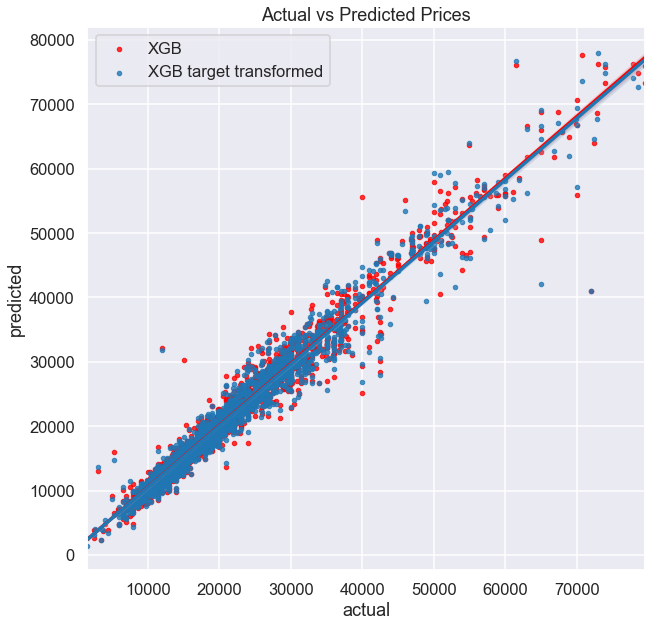

In [175]:
plt.figure(figsize=(10,10))

sns.regplot(y='XGB', x='price', data=output, color='red', marker=".", label='XGB')
sns.regplot(y='XGB_T', x='price', data=output, marker=".", label='XGB target transformed')
plt.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("Actual vs Predicted Prices")
plt.show()

- When Car price < \\$40,000, predicted prices are close to the actual prices. 
- When Car price > \\$40,000, predicted prices went away from the actual prices.
- XGB (red) predictions are far more away from the actual prices (fitted straight line). 

Based on the above plot, target transformation has improved the model performance

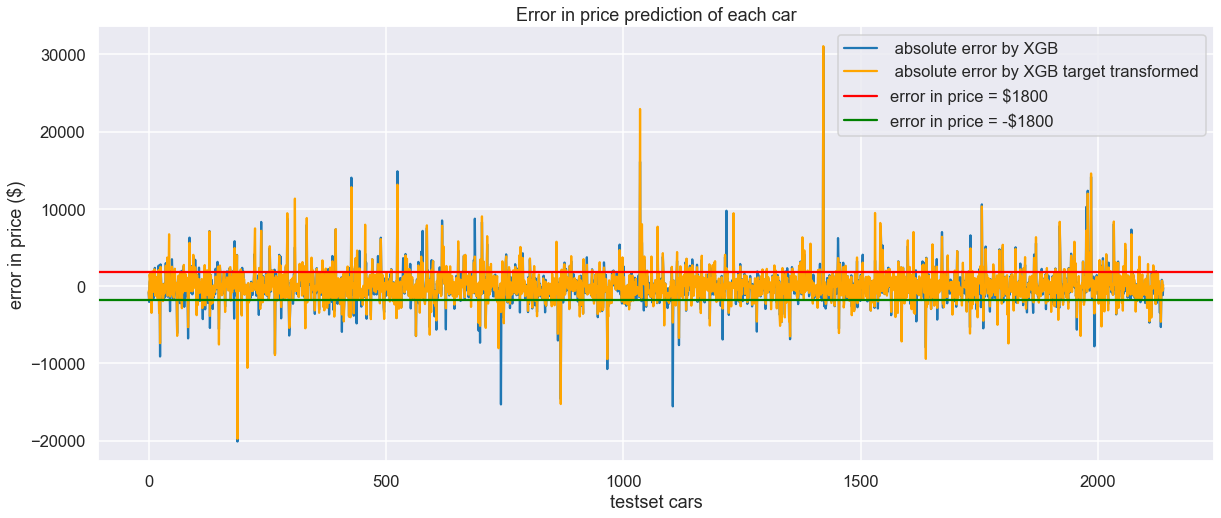

In [176]:
plt.figure(figsize=(20,8))

plt.plot([i for i in range(len(output))], output.price-output.XGB, label=' absolute error by XGB')
plt.plot([i for i in range(len(output))], output.price-output.XGB_T, color='orange', label=' absolute error by XGB target transformed')

plt.axhline(y=1800, color='r', linestyle='-', label = 'error in price = $1800')
plt.axhline(y=-1800, color='g', linestyle='-', label = 'error in price = -$1800')

plt.xlabel("testset cars")
plt.ylabel("error in price ($)")
plt.title("Error in price prediction of each car")

plt.legend()
plt.show()

- nealry 75% of error in car's price lie within the -1800 (green staright line) to 1800 (red straight line)

#### Tree Diagram of the XGB model

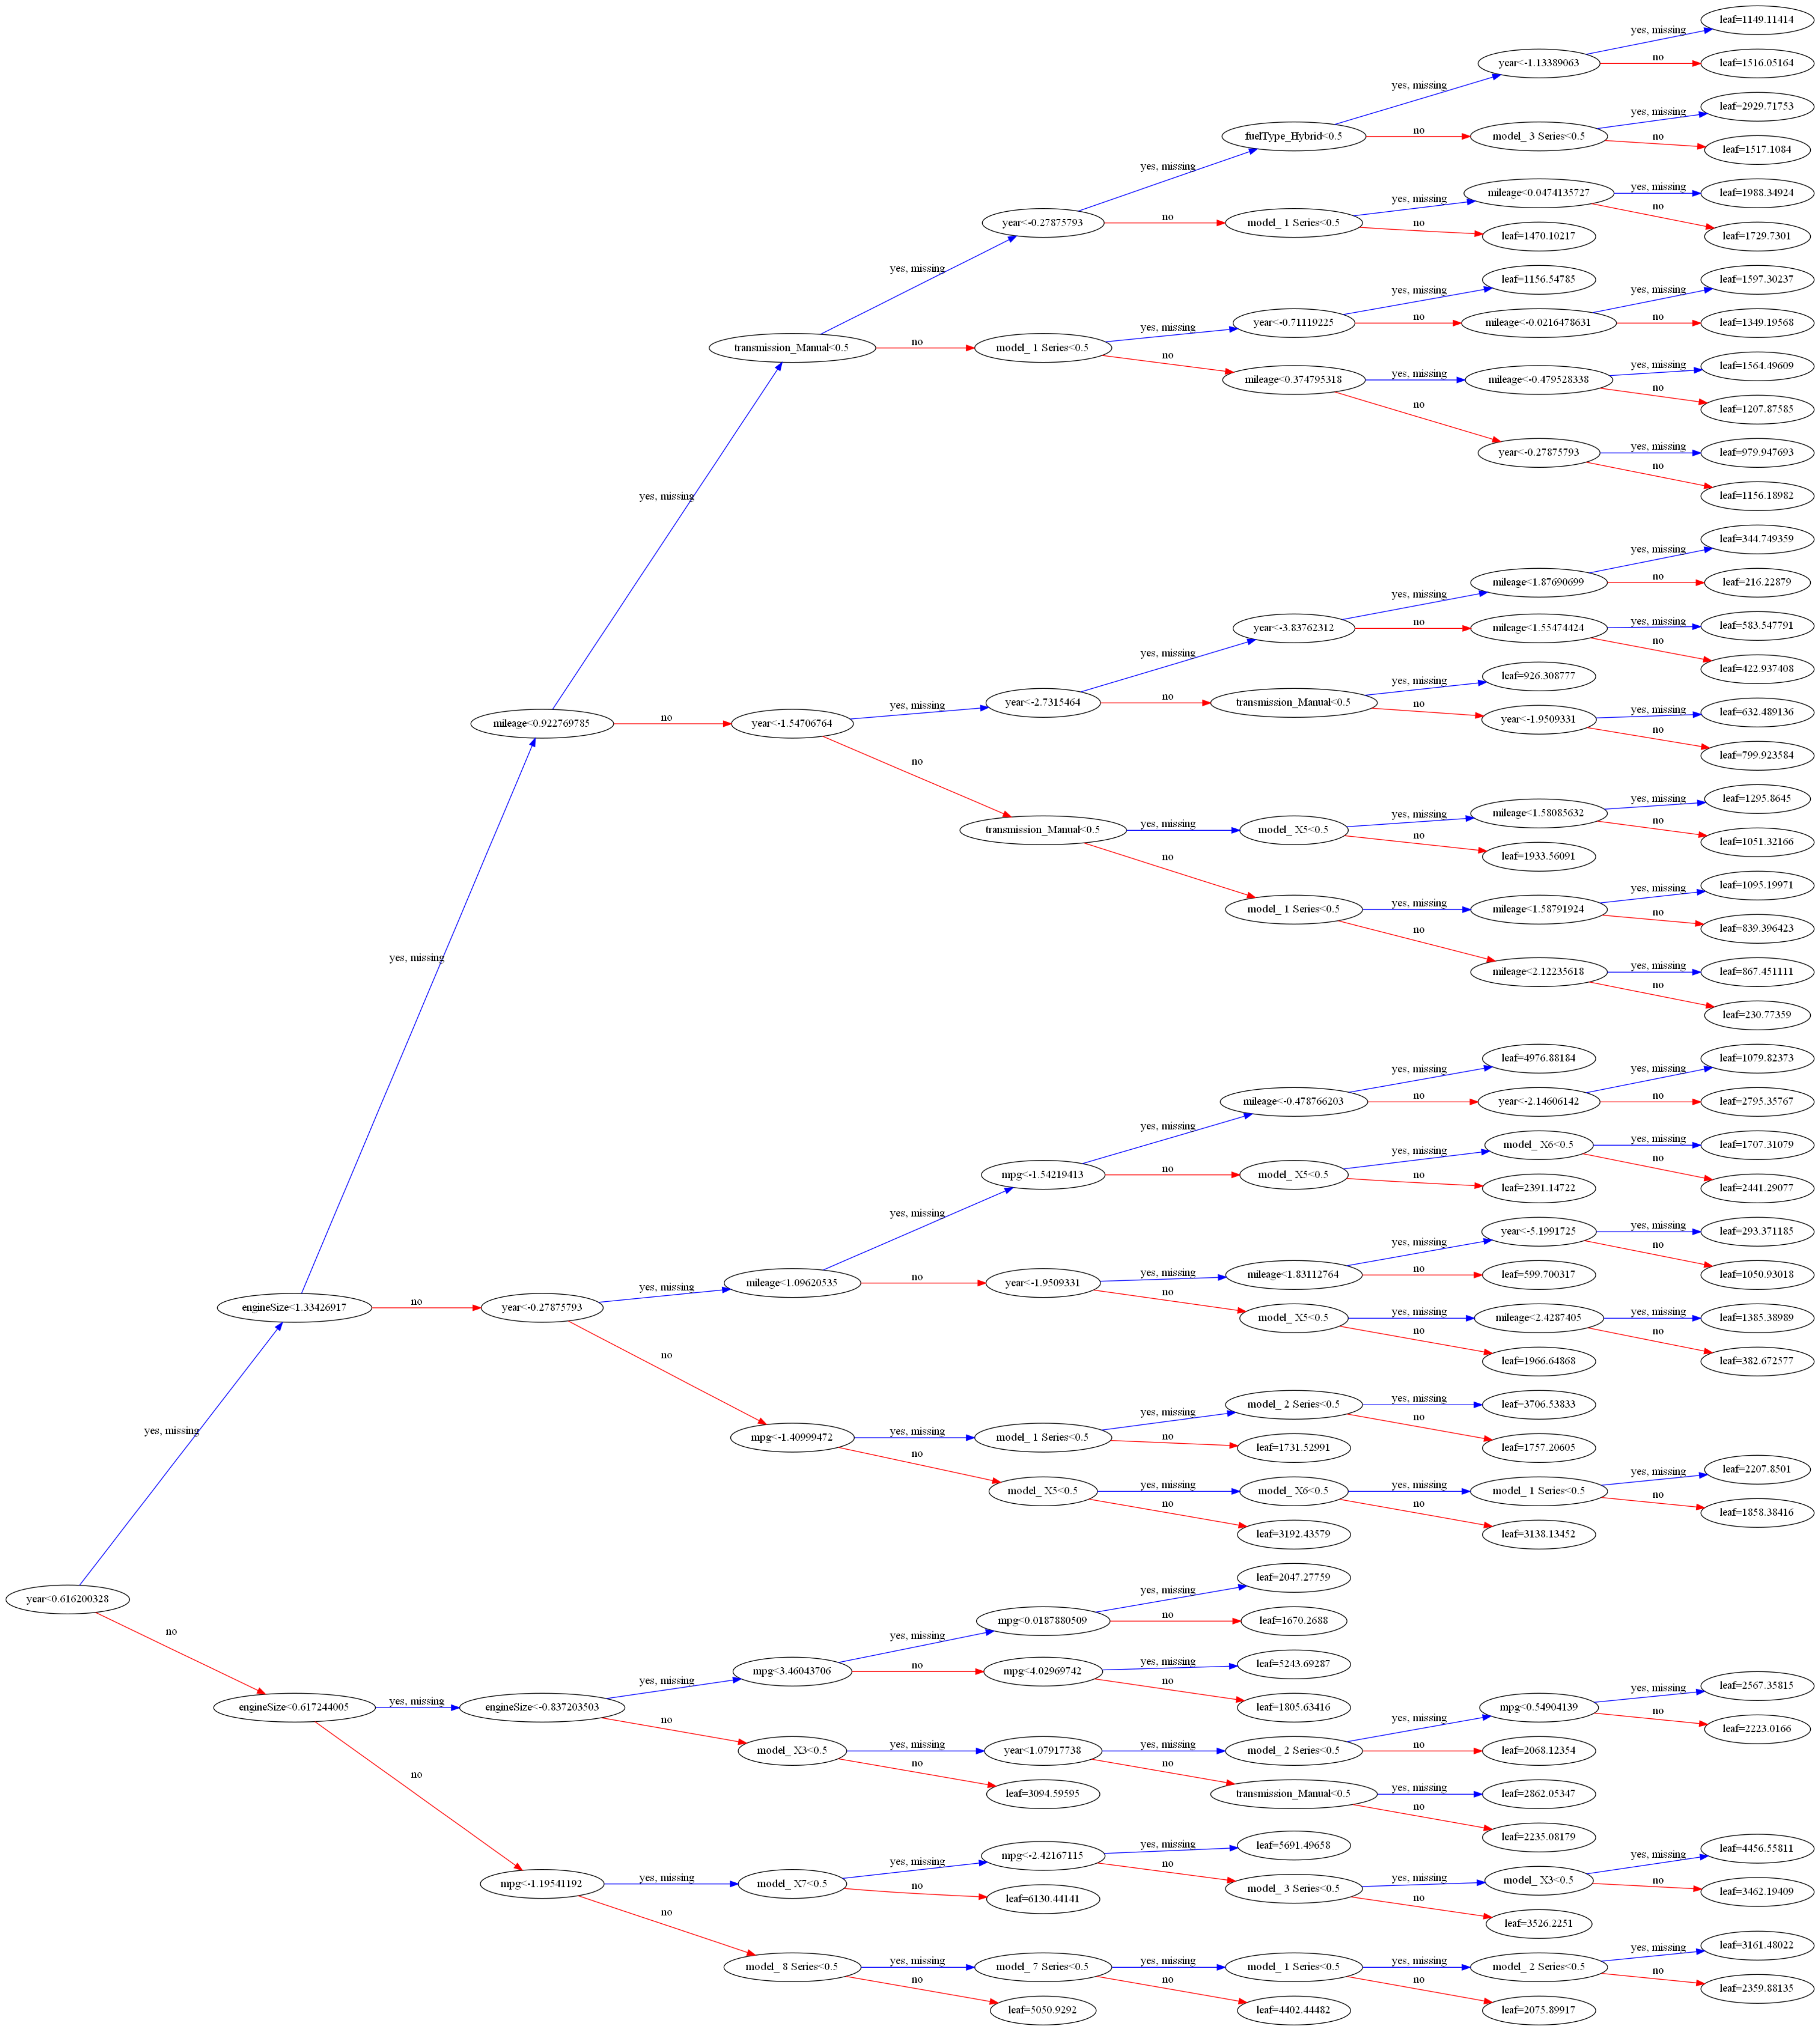

In [156]:
plot_tree(model_XGB.best_estimator_, num_trees=1, rankdir='LR')
plt.gcf().set_size_inches(100, 100)
plt.show()

I wish I could make it more visible. Tree diagram is the best way to understand the ensemble models.

In [157]:
def feature_importance(model, x, regressor_algorithm):
    # find the important features
    importances = model.best_estimator_.feature_importances_

    # Sort importances
    sorted_index = np.argsort(importances)

    # Create labels
    labels = x.columns[sorted_index]

    # Create plot
    _ = plt.barh(range(x.shape[1]), importances[sorted_index], tick_label=labels)
    _ = plt.title("feature importance for " + regressor_algorithm)
    _ = plt.xlabel("feature importance")

    return _

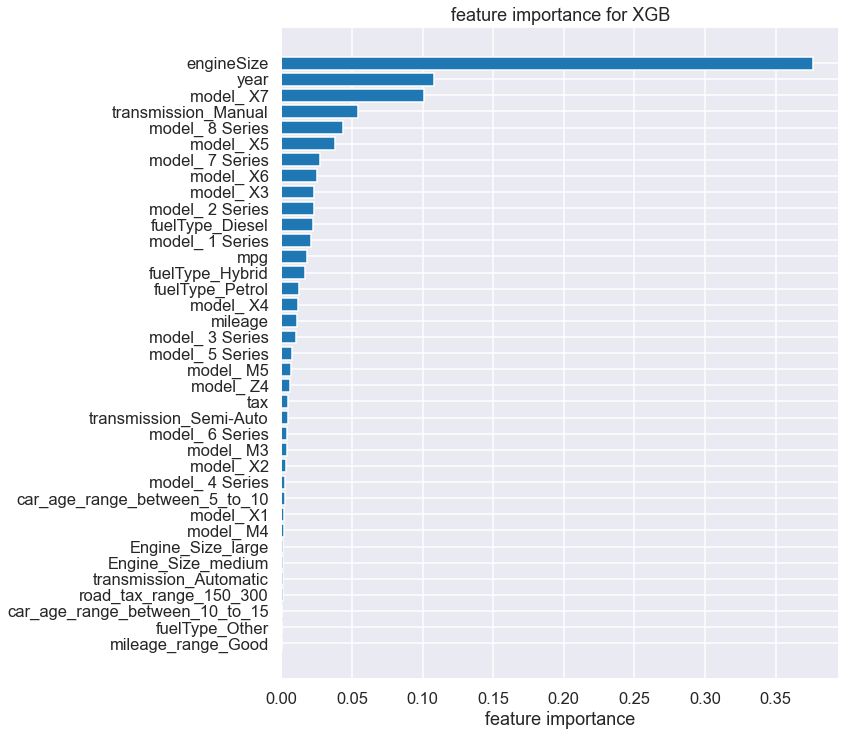

In [177]:
# feature importance for XGB
plt.figure(figsize=(10,12))
feature_importance(model_XGB, X_train, 'XGB')
plt.show()

- **'engineSize'** has the highest feature importance to predict the price of a car. As far as we know, lower the engine size provides better mpg. From the correlation plot, 'engineSize' has the second highest positive correlation with the target variabel price.
- **'year'** is the second highest important feature, which is true. More latest the car, more expensive it is. From the correlation plot, **'year'** has the highest positive correlation with the target variabel price.
- **manual transmission** is an important feature. From the boxenplots, manual transmission cars are cheaper than automatic or semi-auto cars. From the actual vs predicted prices plot, the XGB models predicted quite well for the lower price cars.
- model X7, 8 Series got high importance. These two models have the highest mean price in the dataset.


#### Comparison of different Machine Learning Models

ML_models      MAE     RMSE  R squared
0       Linear Regression  2509.98  3617.76       0.90
1           Decision Tree  2022.34  3074.04       0.93
2           Random Forest  1824.13  2940.15       0.93
3       Gradient Boosting  1502.76  2460.19       0.95
4                     XGB  1446.77  2314.87       0.96
5  XGB_target_transformed  1447.88  2312.33       0.96

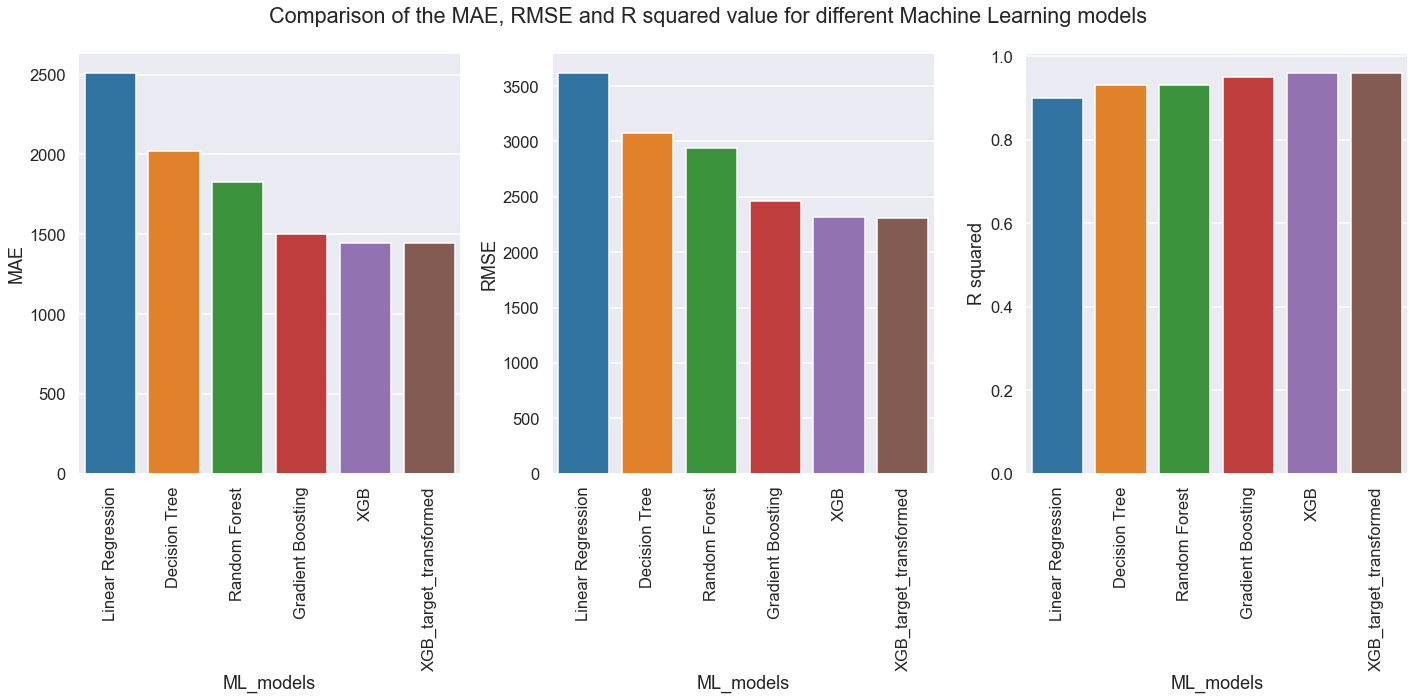

In [178]:
MAE = [MAE_LR, MAE_DT, MAE_RF, MAE_GB, MAE_XGB, MAE_XGB_T]
RMSE = [RMSE_LR, RMSE_DT, RMSE_RF, RMSE_GB, RMSE_XGB, RMSE_XGB_T]
r2 = [r2_LR, r2_DT, r2_RF, r2_GB, r2_XGB, r2_XGB_T]
ML_models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGB', 'XGB_target_transformed']

kpi_comparison = pd.DataFrame({"ML_models":ML_models, "MAE":MAE, "RMSE":RMSE, "R squared":r2})
kpi_comparison = kpi_comparison.round(2)
display(kpi_comparison)

plt.figure(figsize=(20,10))

for col in range(1, kpi_comparison.shape[1]):
    plt.subplot(1,3,col)
    sns.barplot(x = 'ML_models', y = kpi_comparison.columns[col], data=kpi_comparison)
    plt.xticks(rotation=90)

plt.suptitle("Comparison of the MAE, RMSE and R squared value for different Machine Learning models")
plt.tight_layout()
plt.show()

Finally, comapring 6 machine learning models with 3 different accuracy metrics, the best models are by rank:
1. XGB with target transformation (lowest MAE in test and cross-validation set (MAE very close to XGB without target transformation model for the test set), lowest RMSE, highest R squared)
2. XGB without target transformation (lowest MAE in test and cross-validation set, second lowest RMSE, highest R squared)
3. Gradient Boosting Regressor
4. Random Forest Regressor
5. Decision Tree Regressor
6. Linear Regression

I also tried with the PCA and took the best 12 PCA features which represent 95% variance of the total features but after applying XGB, it didn't imrpove the model performance. In future, in order to make the prediction more accurate, I can suggest to add few new features in the dataset such as accident history, car's internal and exterior condition, car title, color, location etc.